In [13]:
import gpytorch
import numpy as np
import pandas as pd
import torch
from datetime import datetime

from bo_functions import bo_iter_w_runs
from bo_functions import find_train_doc_path
from bo_functions import set_ep

import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300

In [18]:
#Set Date and Time
dateTimeObj = datetime.now()
timestampStr = dateTimeObj.strftime("%d-%b-%Y (%H:%M:%S)")
print("Date and Time: ", timestampStr)
DateTime = dateTimeObj.strftime("%Y/%m/%d/%H-%M-%S%p")
DateTime = None ##For Testing

#Set Parameters
BO_iters = 2
runs = 1

Theta_True = np.array([1,-1])
train_iter = 300
noise_std = 0.1
shuffle_seed = 9

sep_fact = 1
set_lengthscale = None

emulator = False
sparse_grid = False
obj = "LN_obj"

verbose = True
save_fig = False

# Find Optimal Exploration Parameter Value and set len_data
if emulator == True:
    t = 100
else:
    t = 20
    
explore_bias = set_ep(emulator, obj, sparse_grid)
ep = torch.tensor([float(explore_bias)])

#Pull Experimental data from CSV
exp_data_doc = 'Input_CSVs/Exp_Data/n=5.csv'
exp_data = np.array(pd.read_csv(exp_data_doc, header=0,sep=","))
Xexp = exp_data[:,1]
Yexp = exp_data[:,2]
n = len(Xexp)

#Define GP Testing space
p=20
Theta1 =  np.linspace(-2,2,p) #1x10
Theta2 =  np.linspace(-2,2,p) #1x10
theta_mesh = np.array(np.meshgrid(Theta1, Theta2)) #2 Uniform 5x5 arrays

Date and Time:  09-Sep-2022 (15:11:00)


Runs: 1
BO Iters: 2
----------------------------------------------------
Separation Factor Train/Test: 1
Lengthscale Set To: None
Initial Explore Bias: 0.5
Run Number:  1


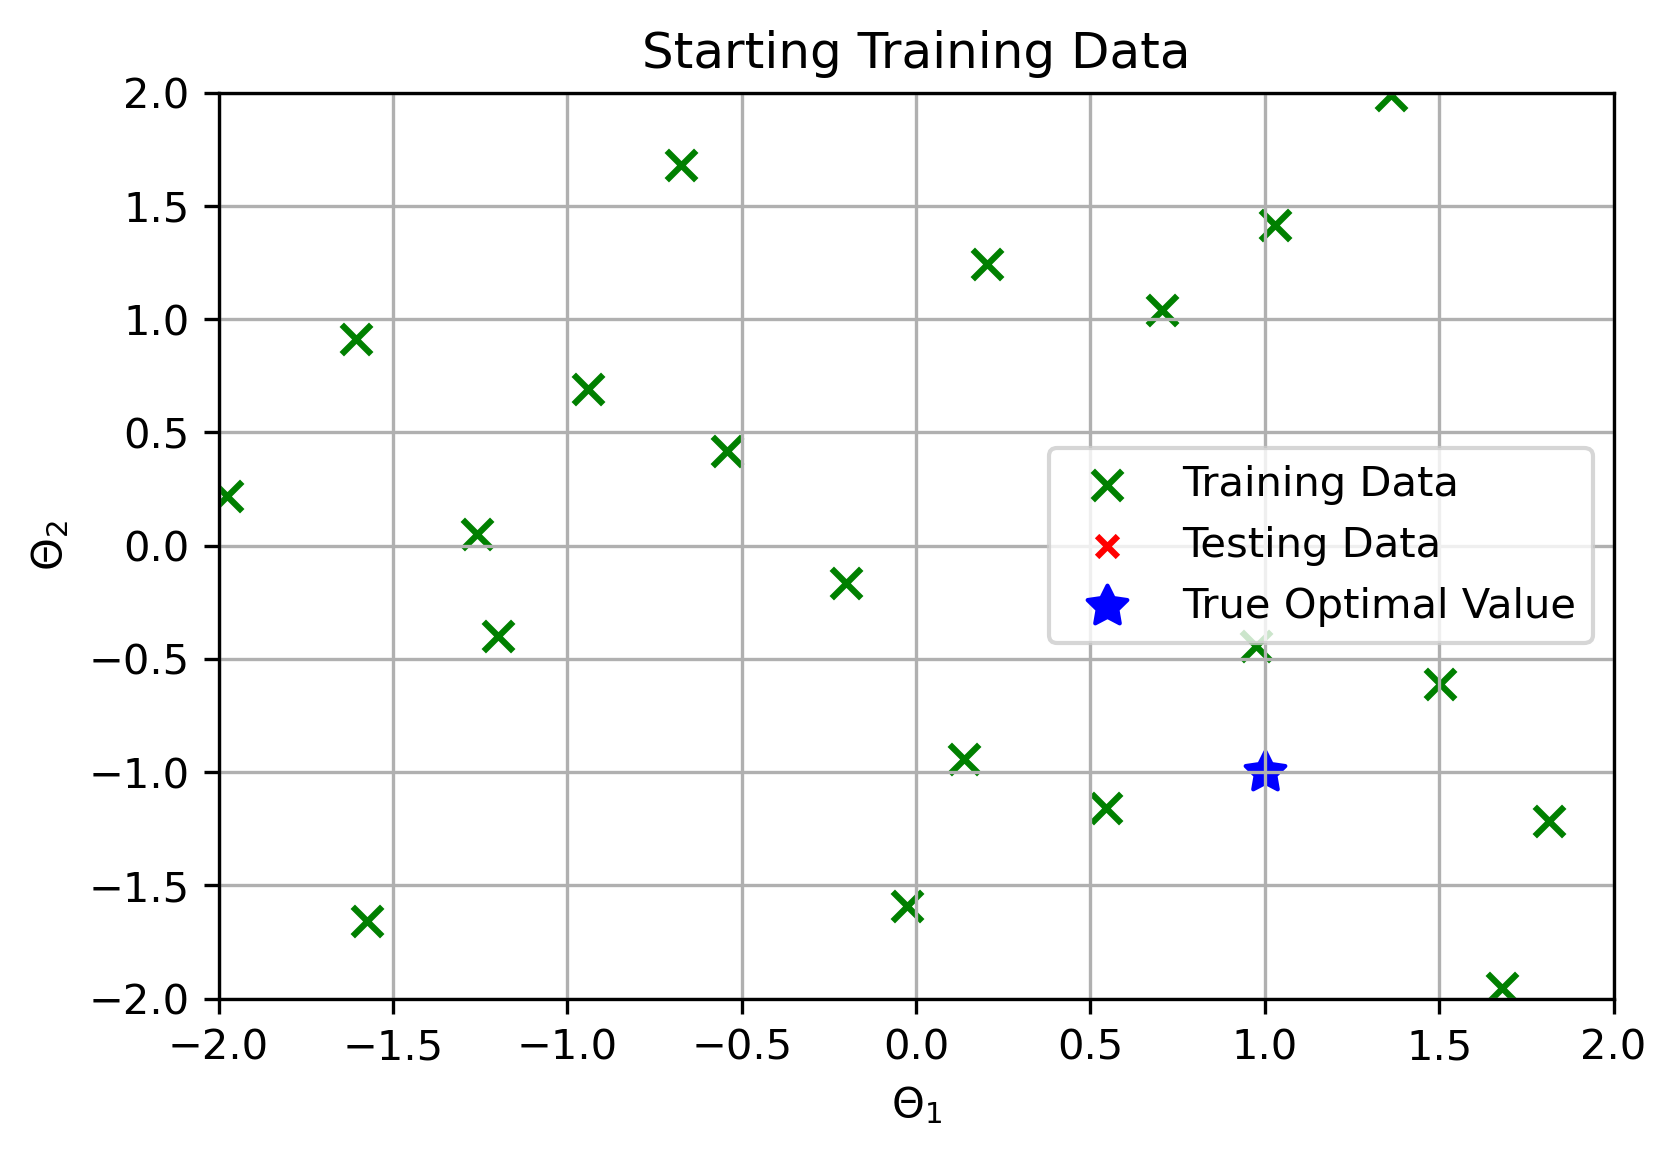

BO Iteration =  1
Exploration Bias Factor =  tensor([0.5000])
Scipy Theta Best =  [ 1.00281978 -1.1894251 ]
Argmax Theta Best =  [ 0.94736842 -1.15789474]
Scipy Theta Opt =  [ 0.90275607 -1.17186508]
Argmin Theta_Opt_GP =  [ 0.94736842 -1.15789474]
EI_max = 0.0040108363221592475 



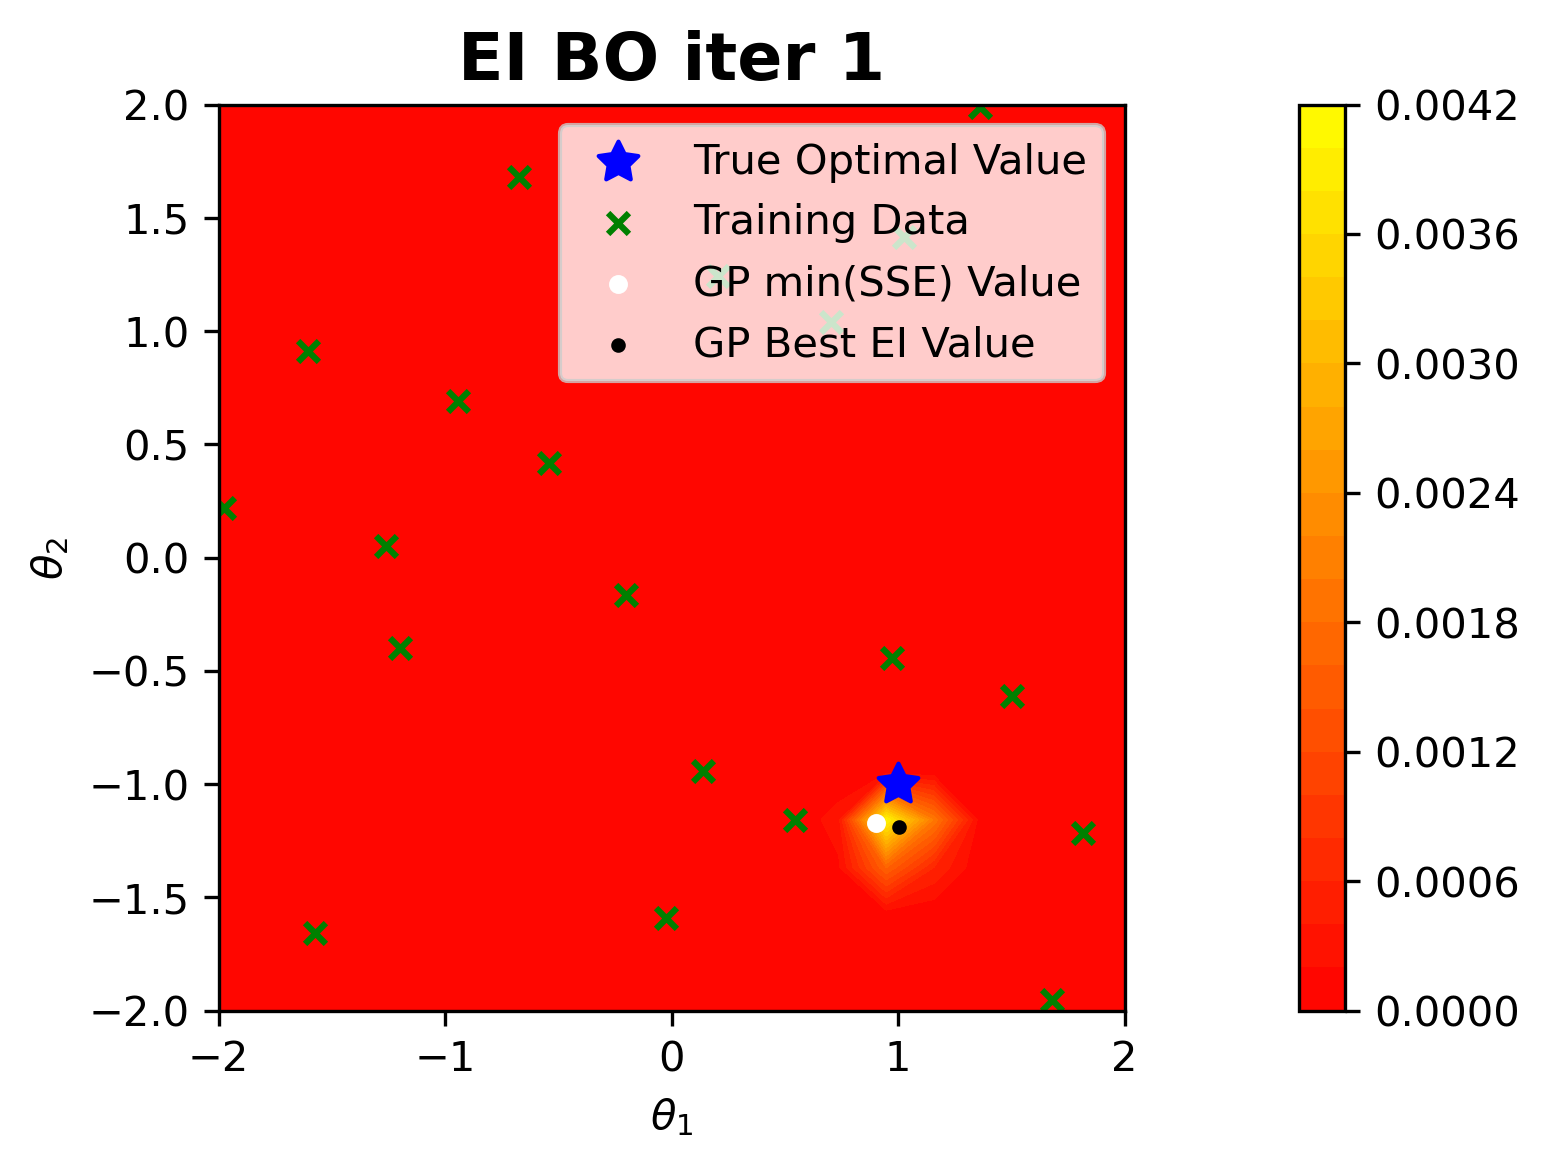

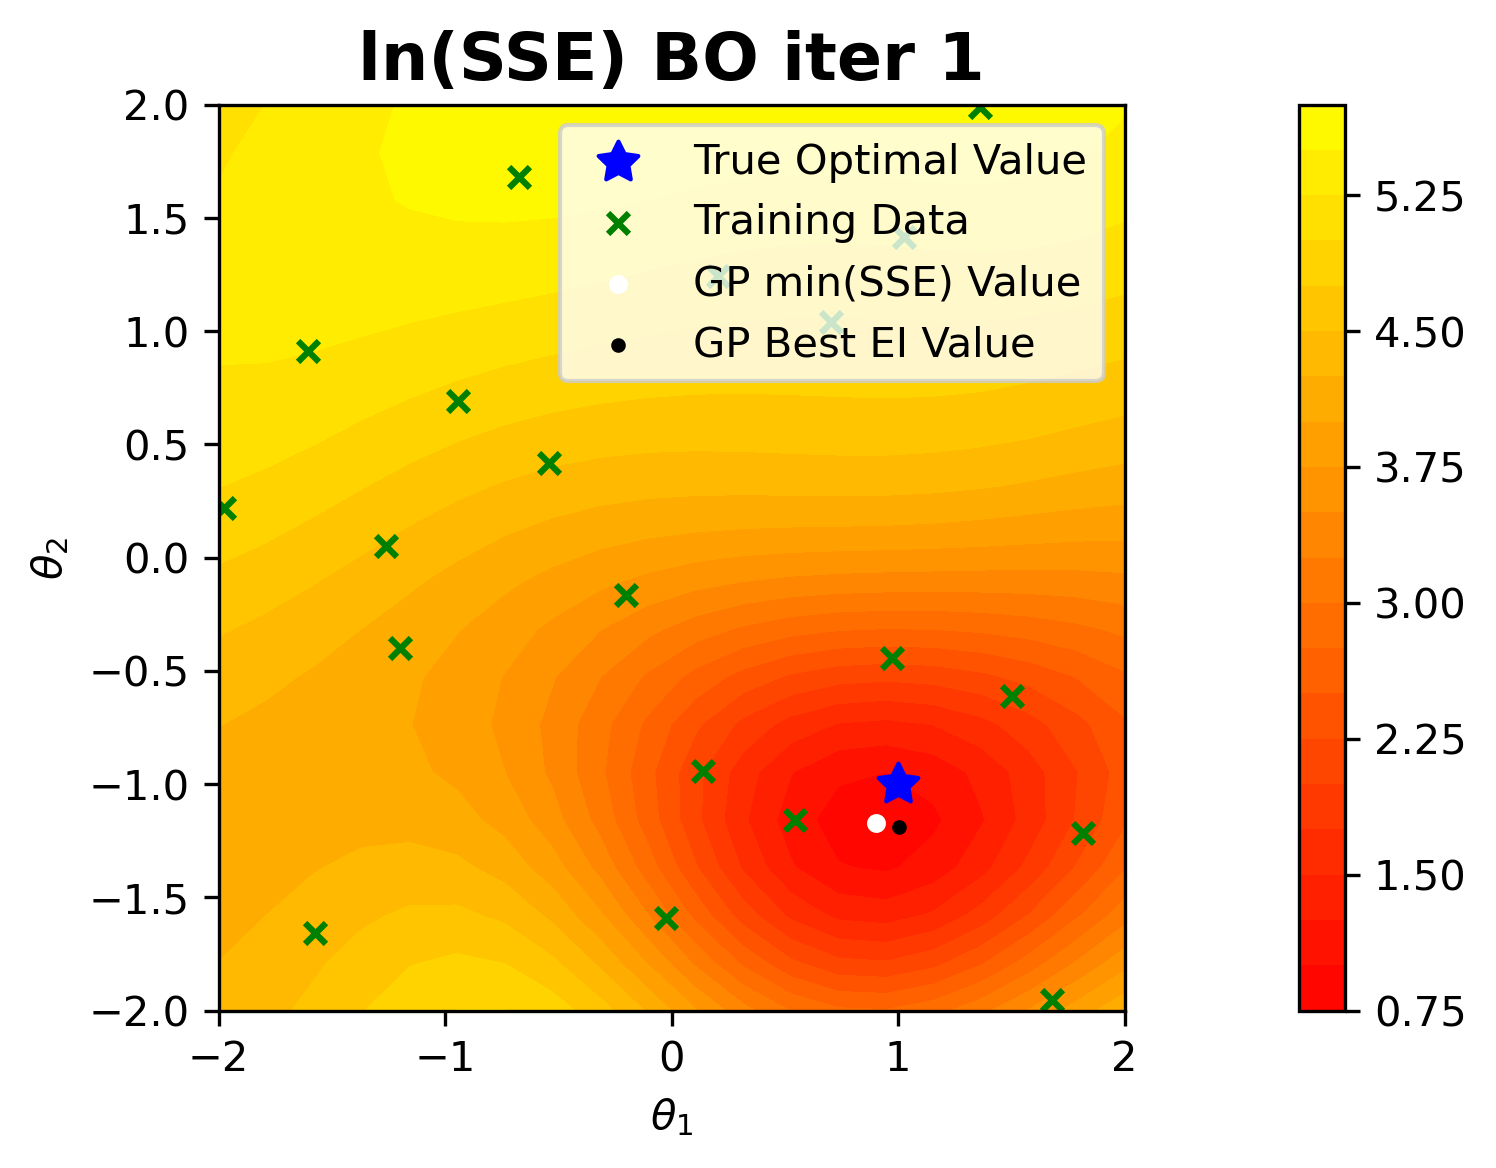

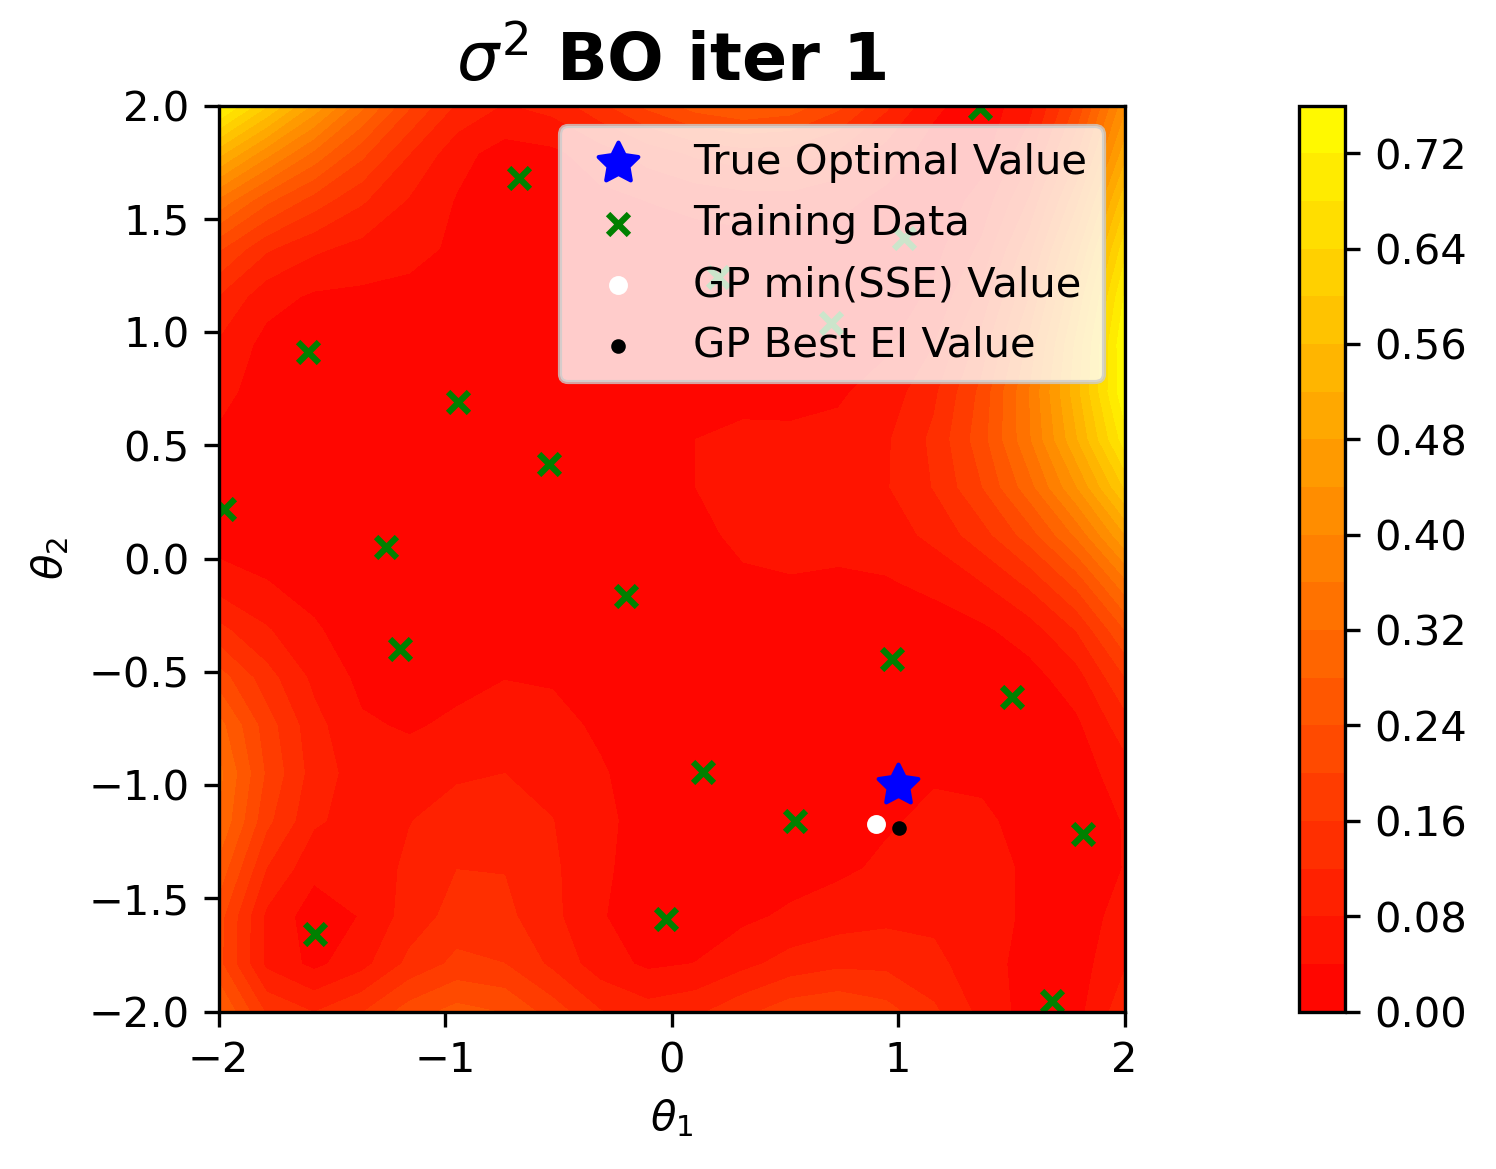

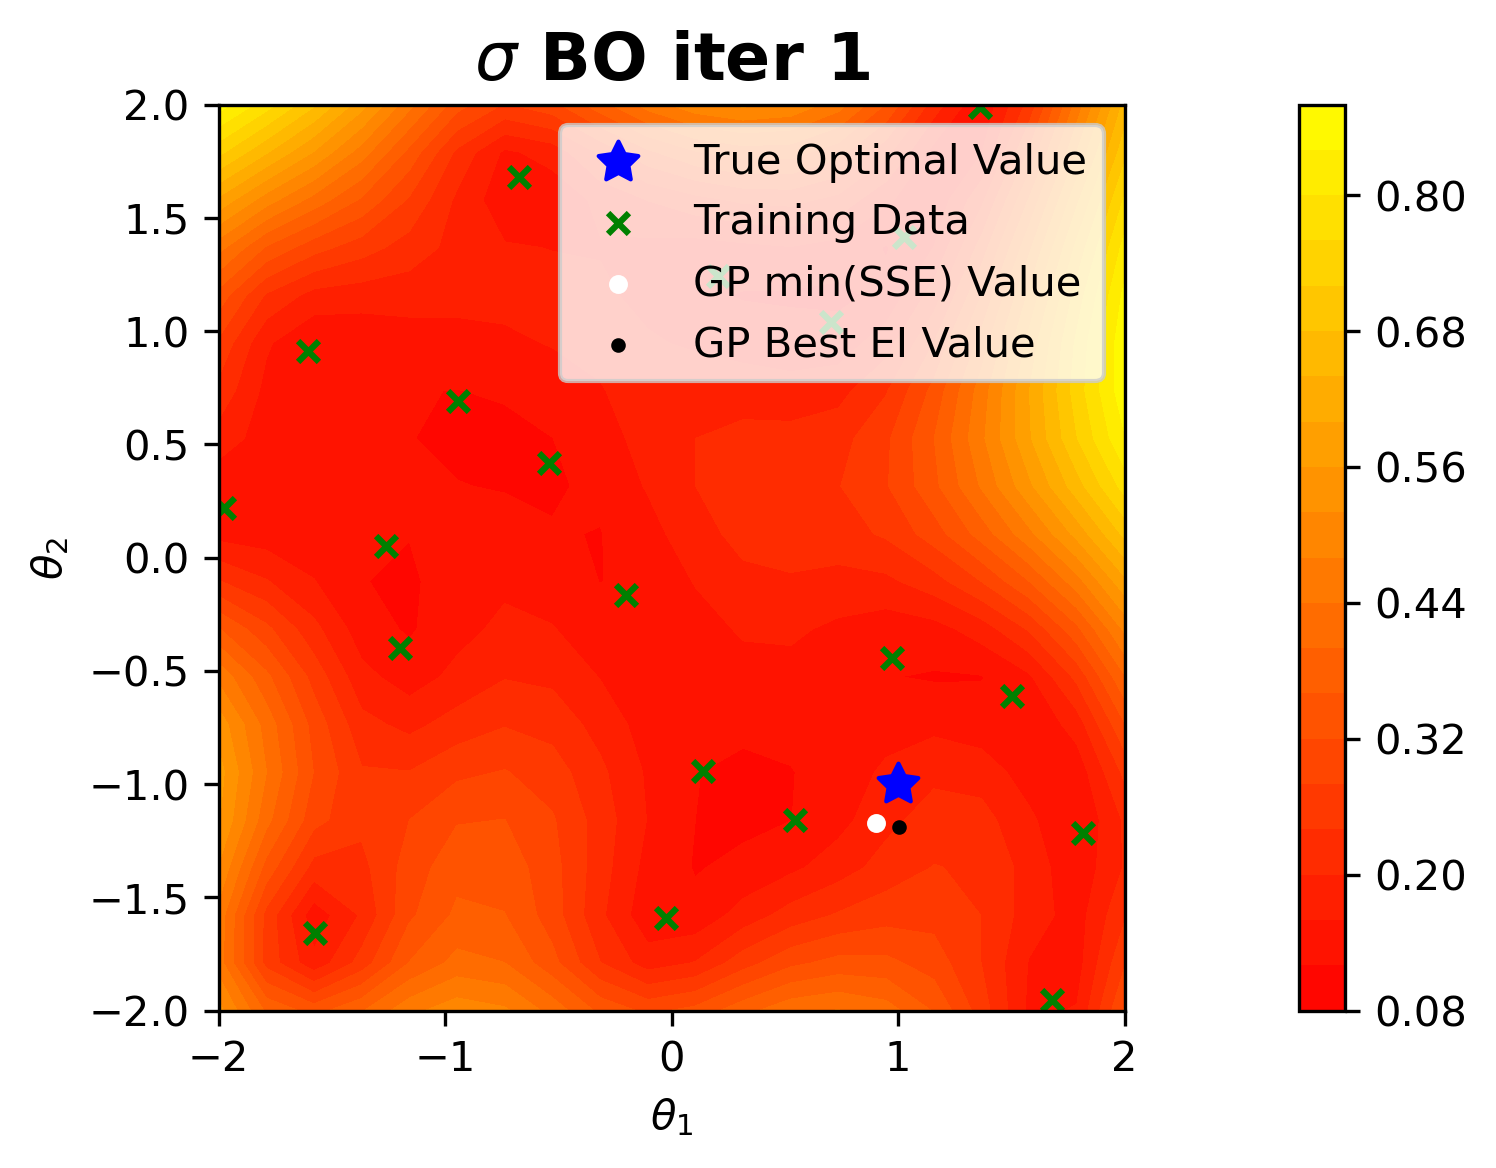

Best Error is: 1.0376


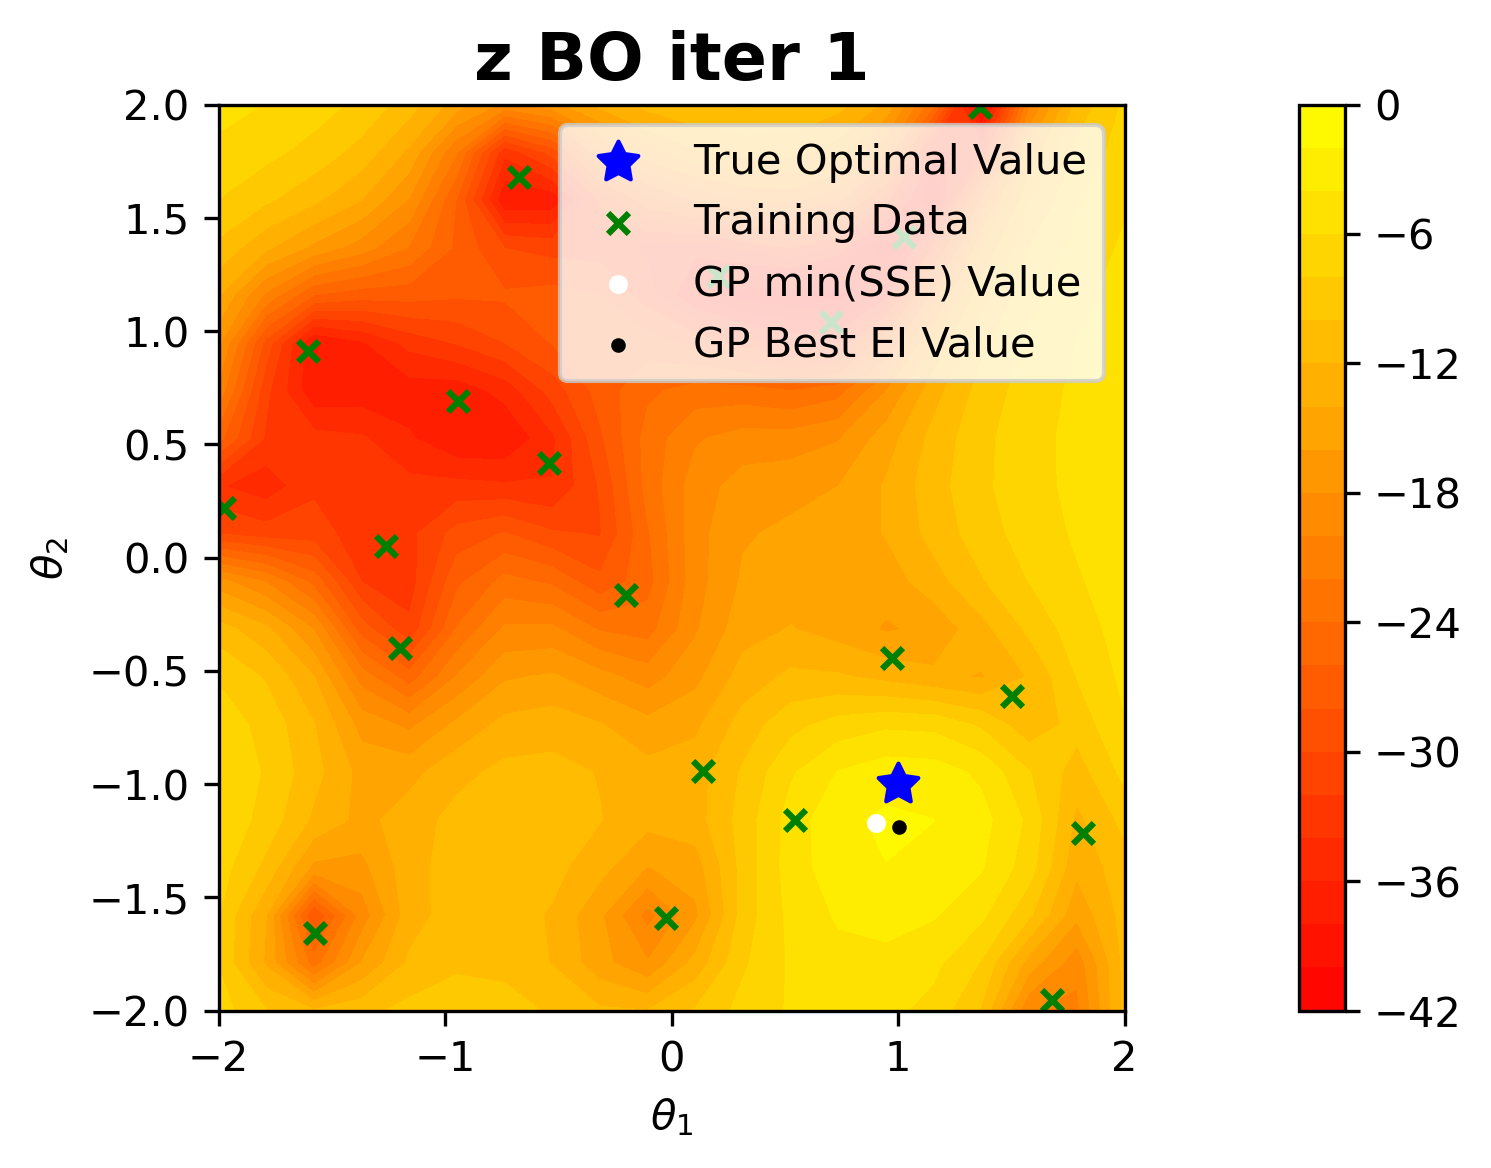

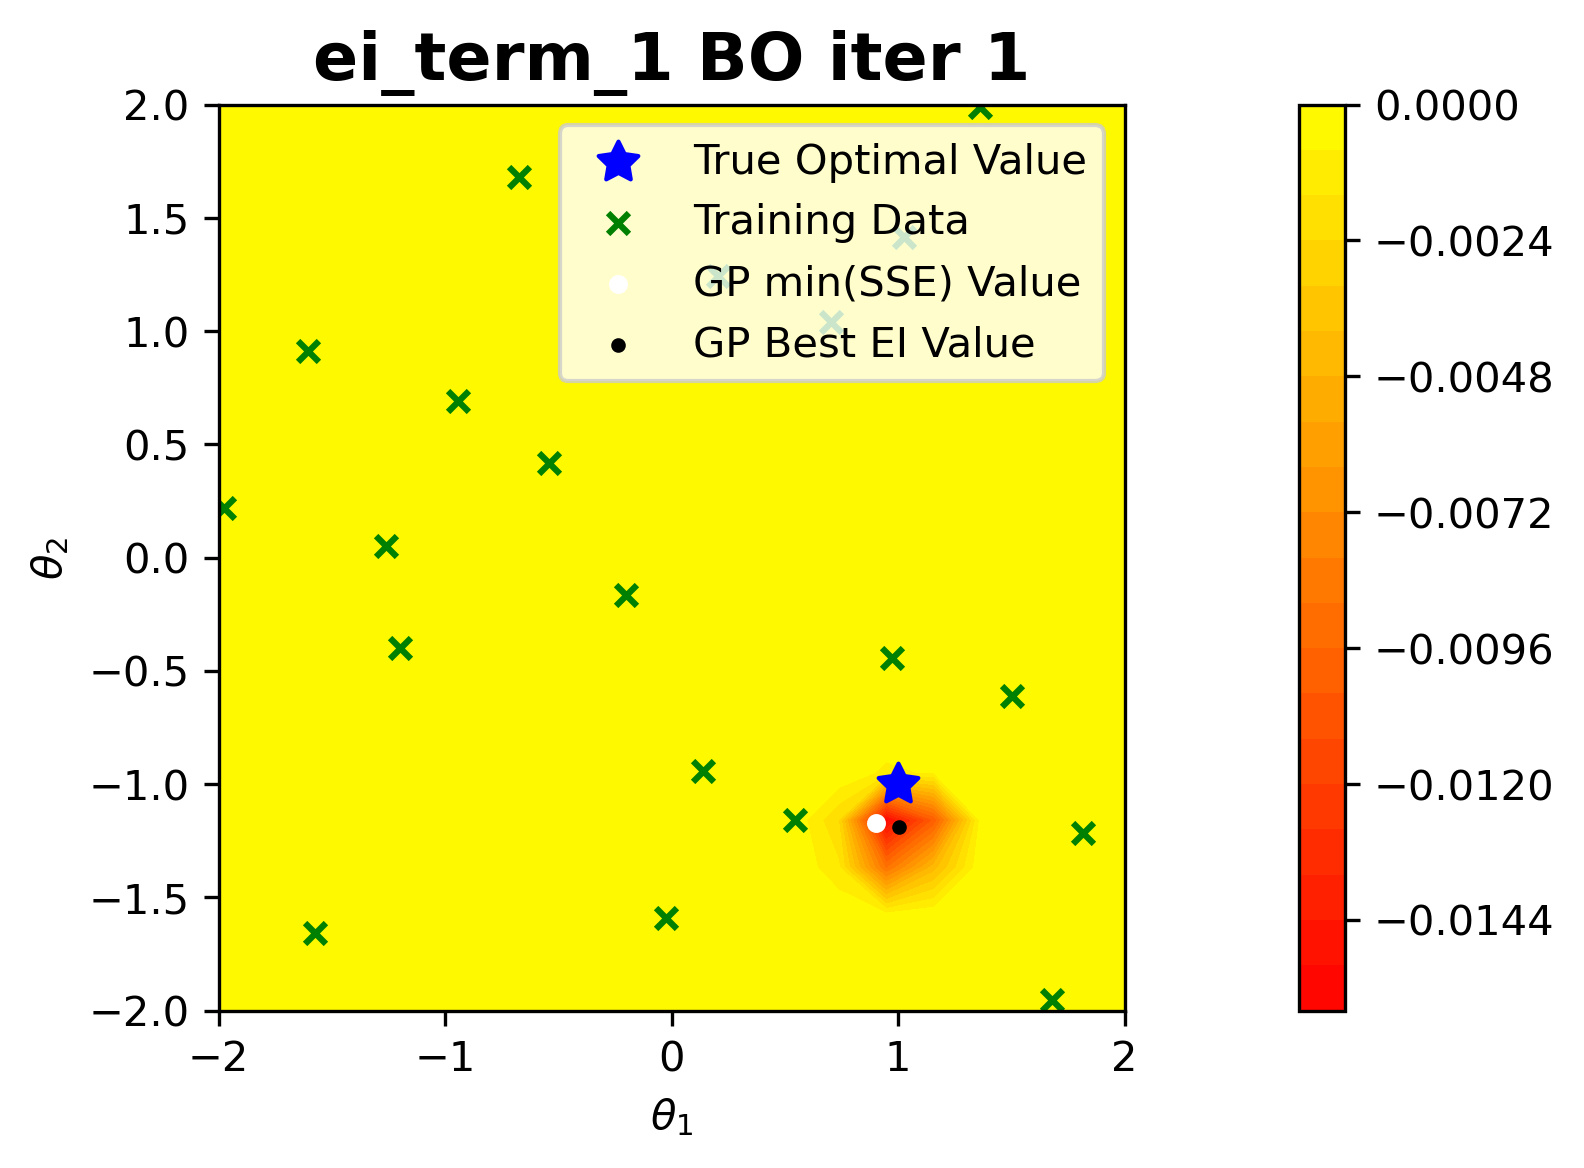

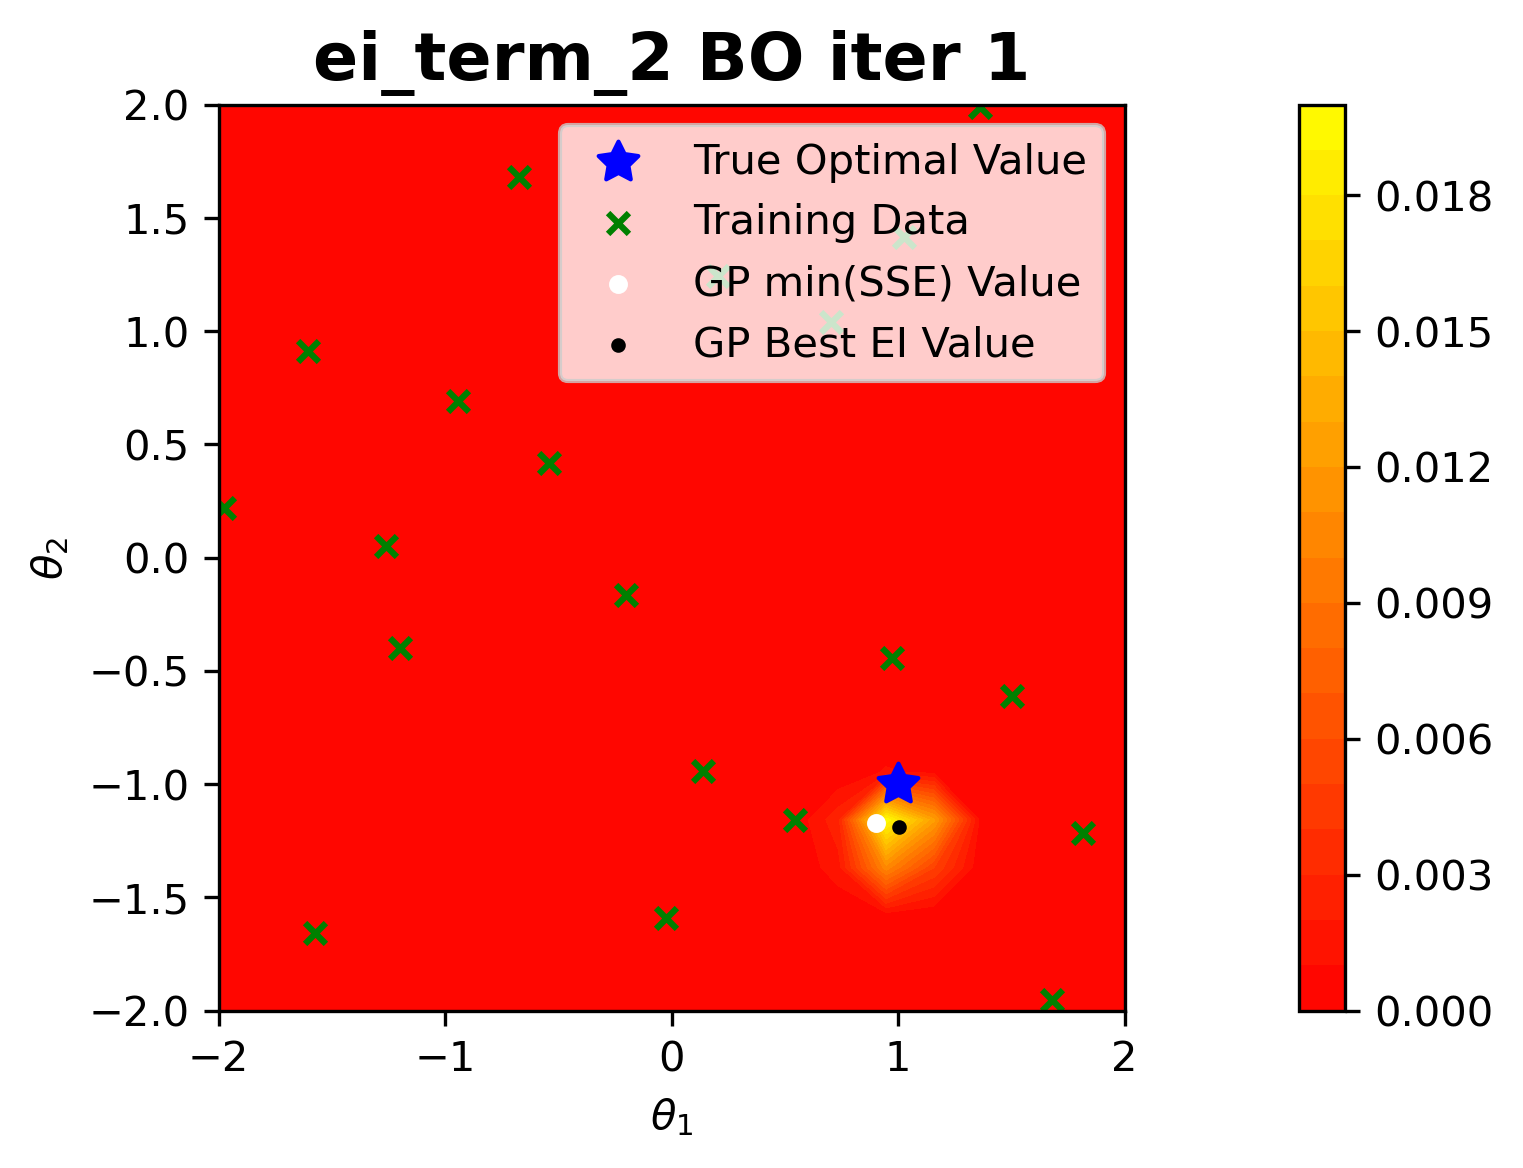

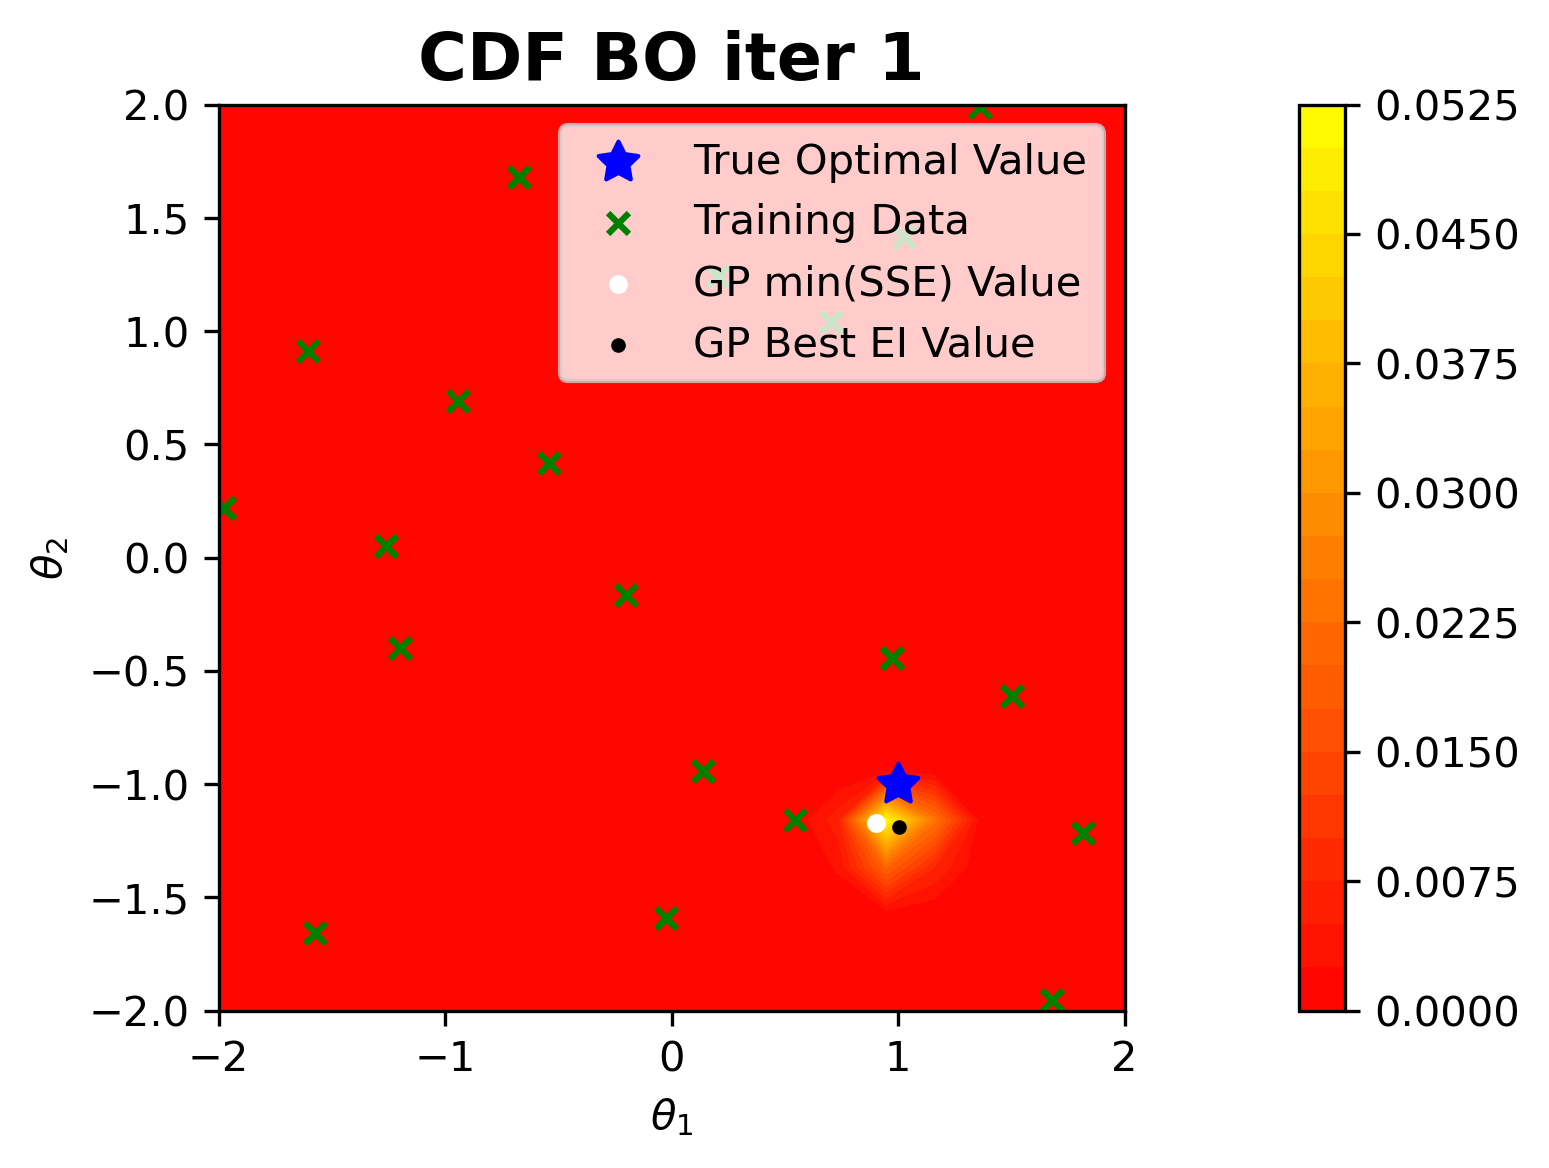

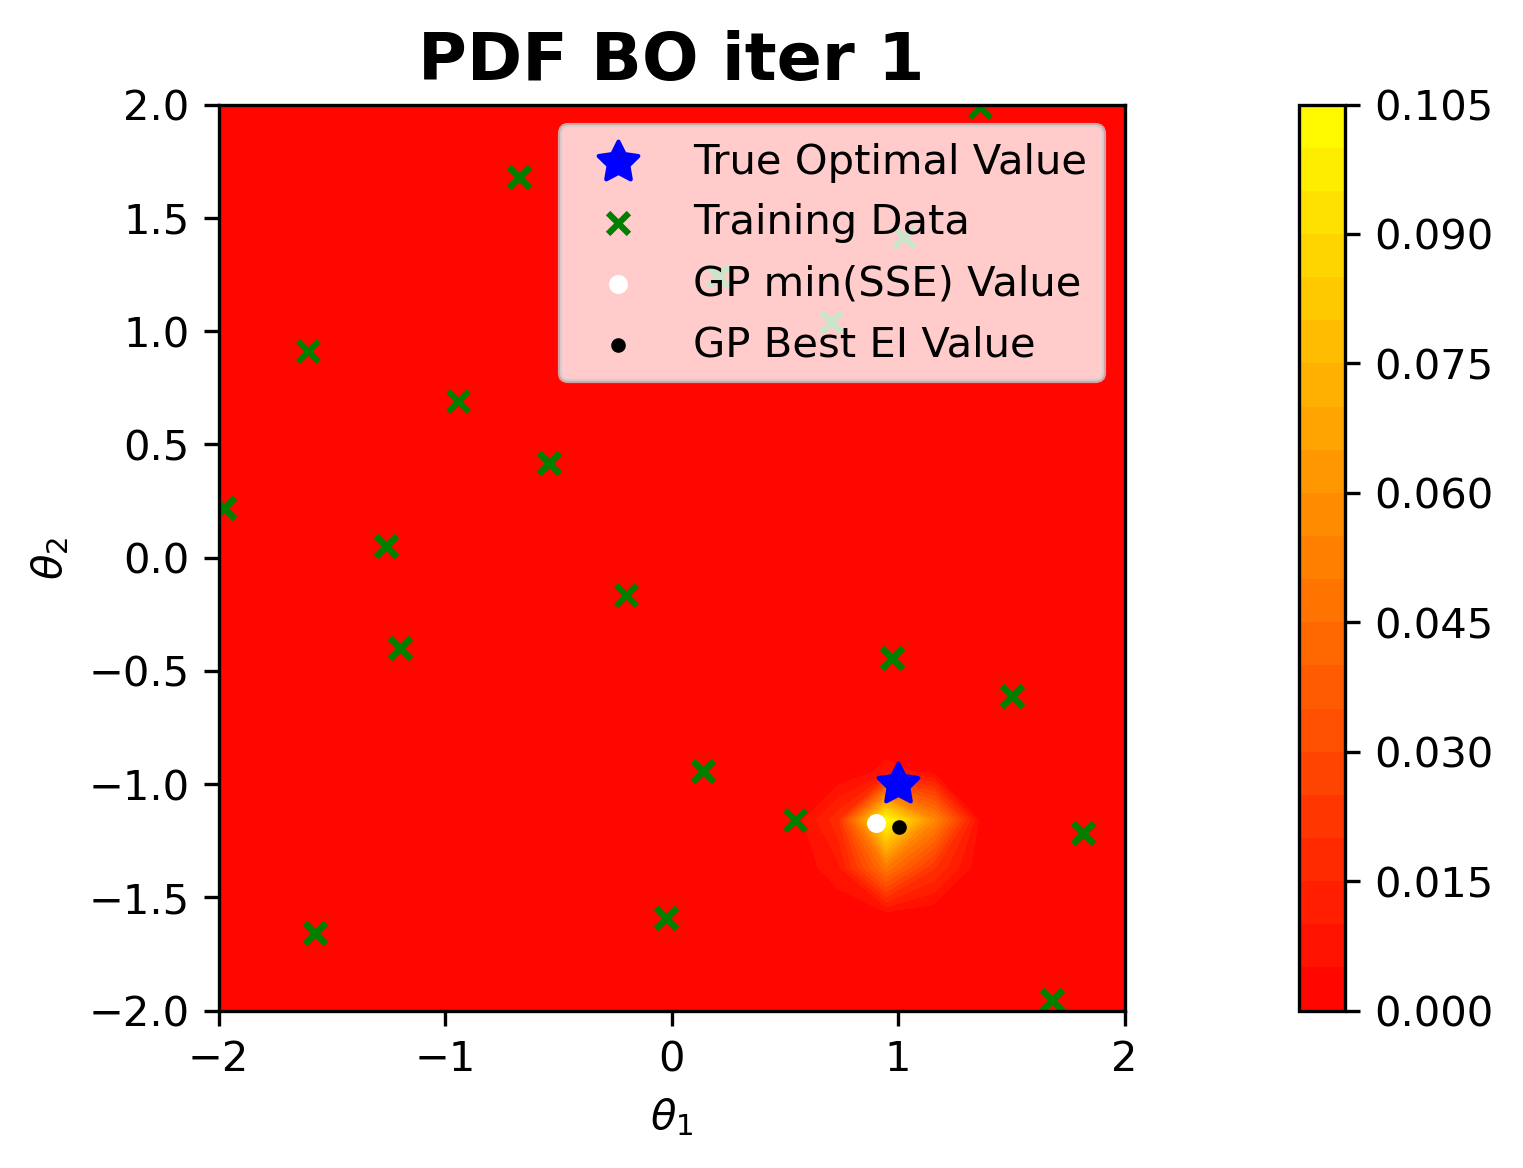

Magnitude of ln(SSE) given Theta_Opt =  [ 0.90275607 -1.17186508] is 4.7761e-02
BO Iteration =  2
Exploration Bias Factor =  tensor([0.5000])
Scipy Theta Best =  [ 1.1578948  -1.15789474]
Argmax Theta Best =  [ 1.15789474 -1.15789474]
Scipy Theta Opt =  [ 1.03017434 -1.20296579]
Argmin Theta_Opt_GP =  [ 0.94736842 -1.15789474]
EI_max = 0.0036707846711472036 



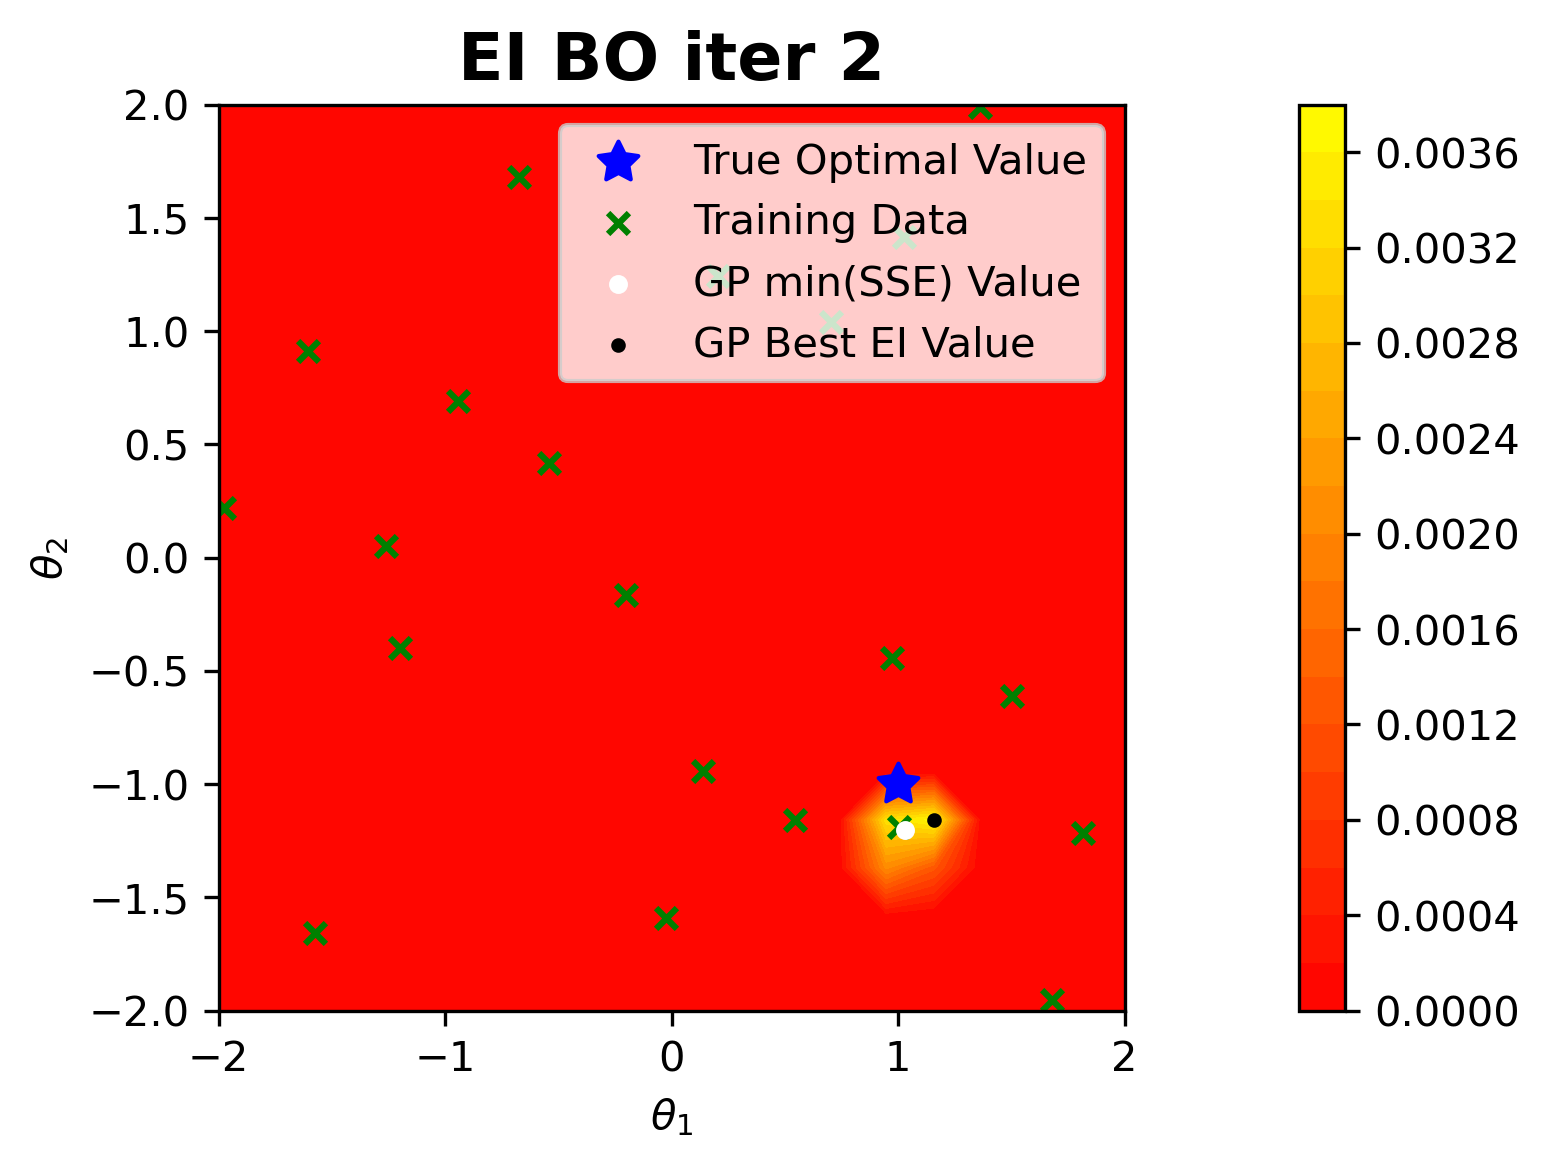

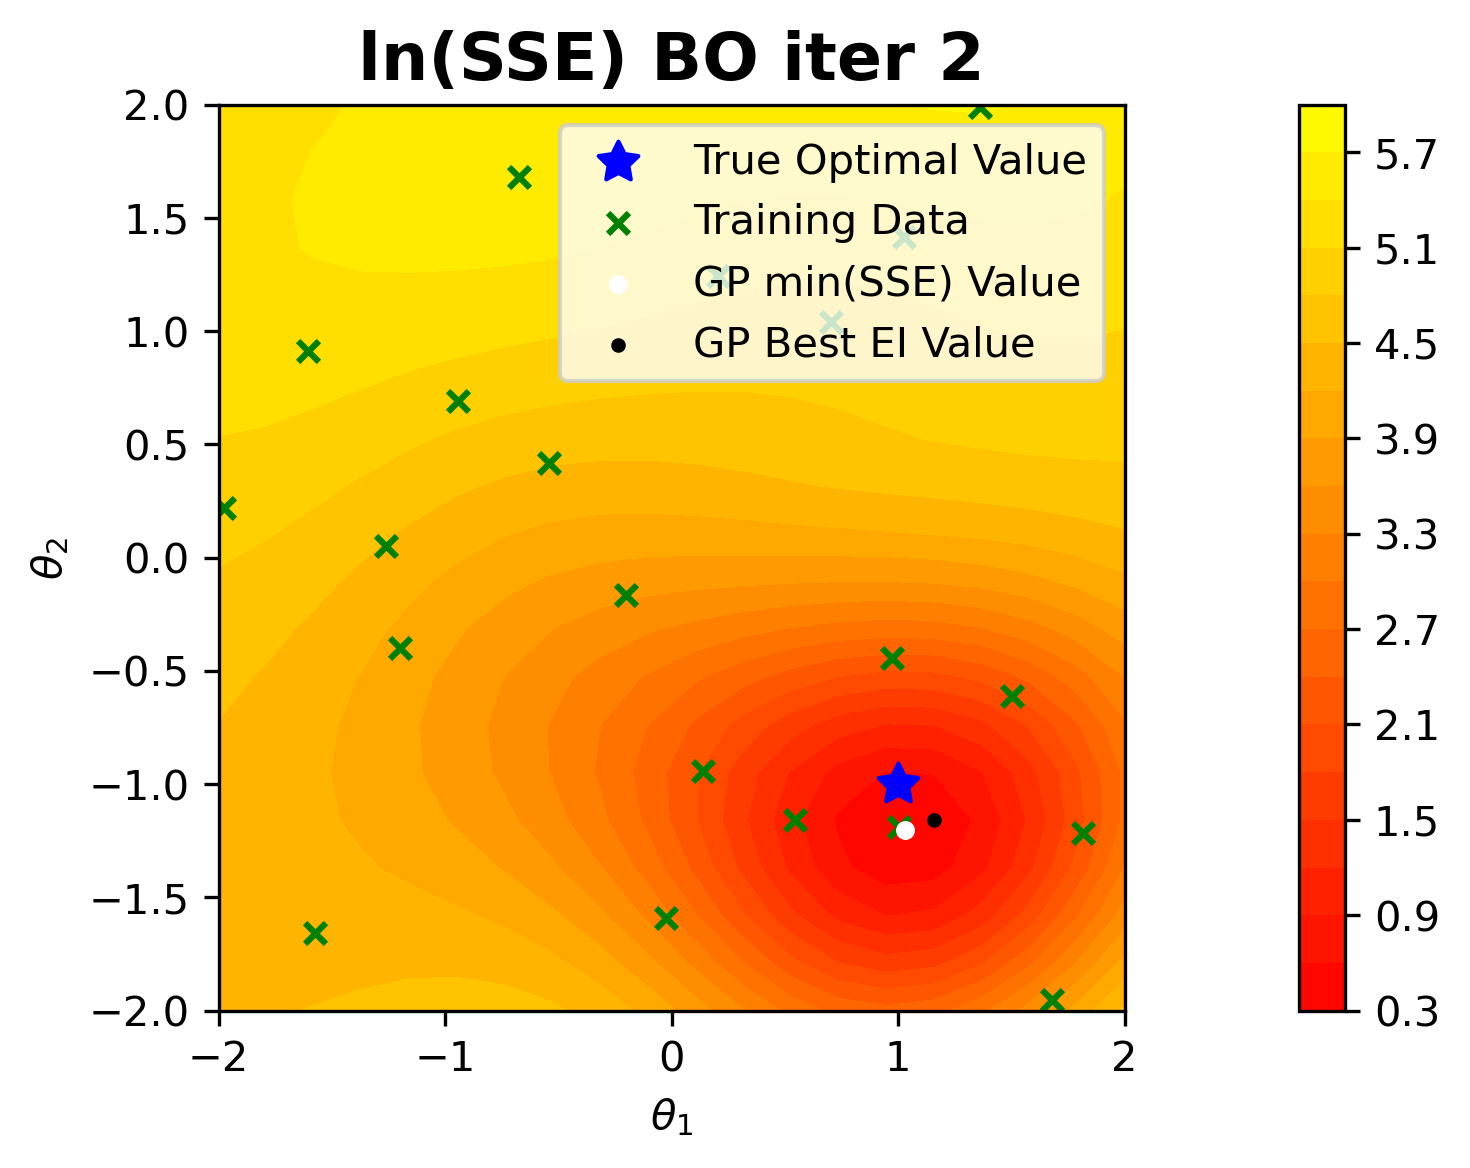

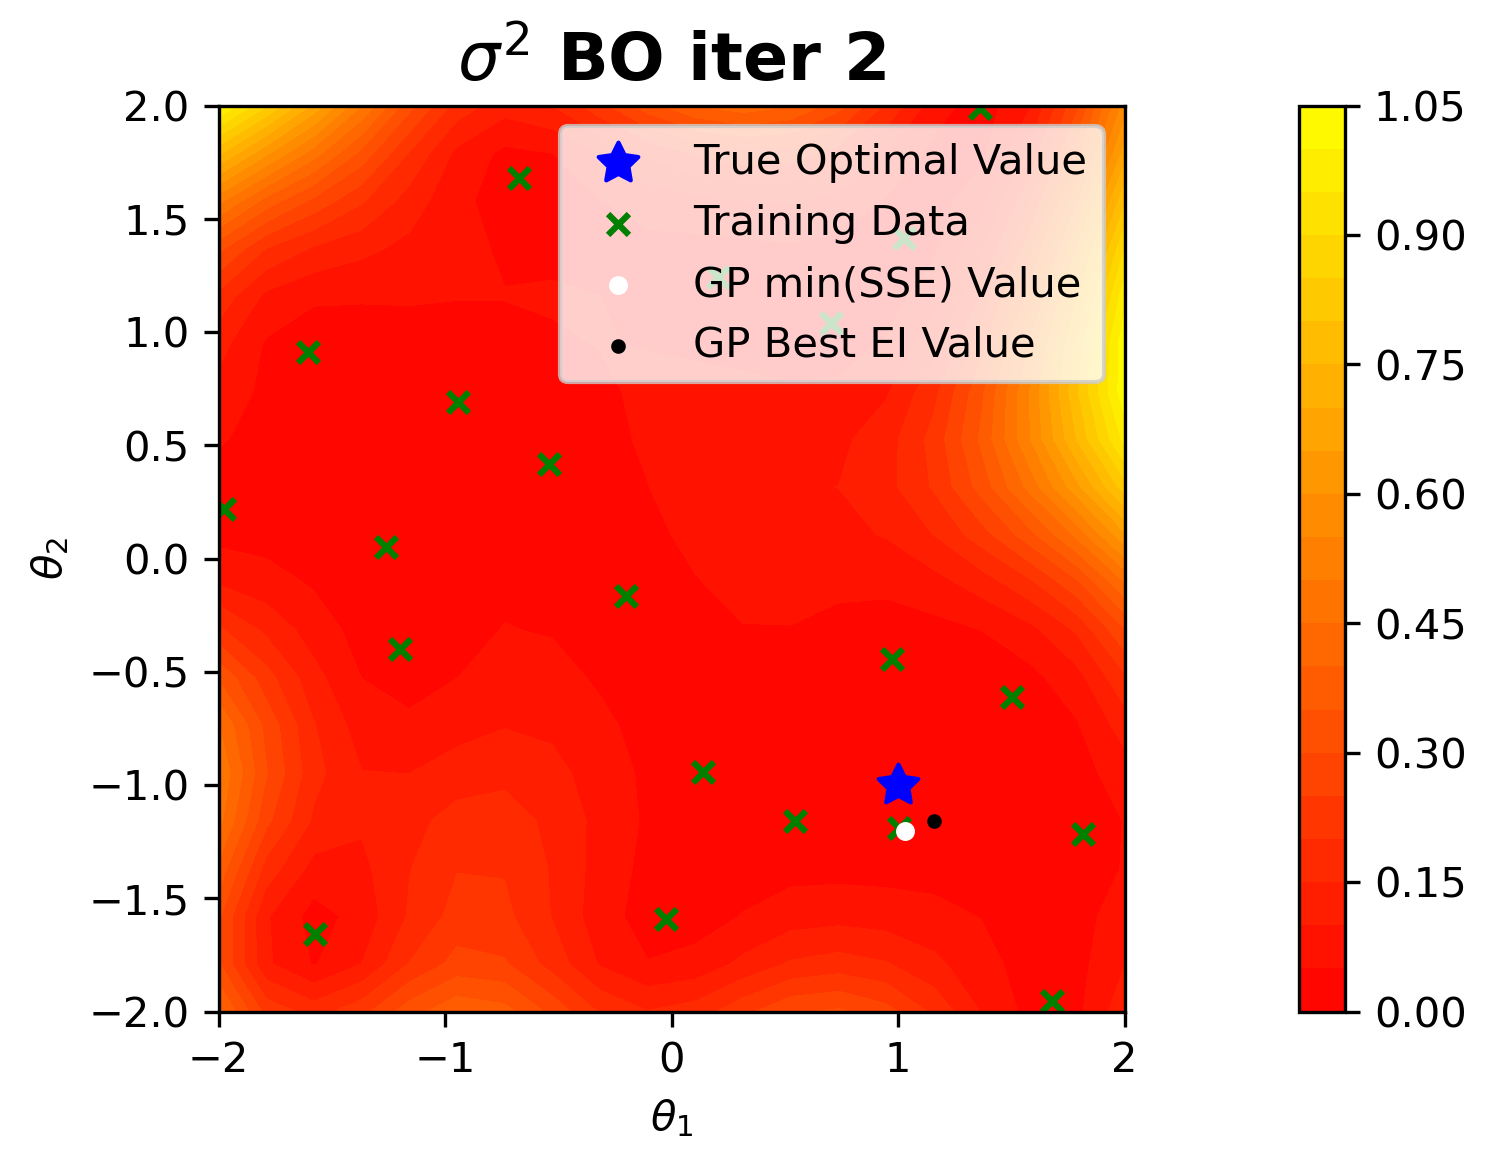

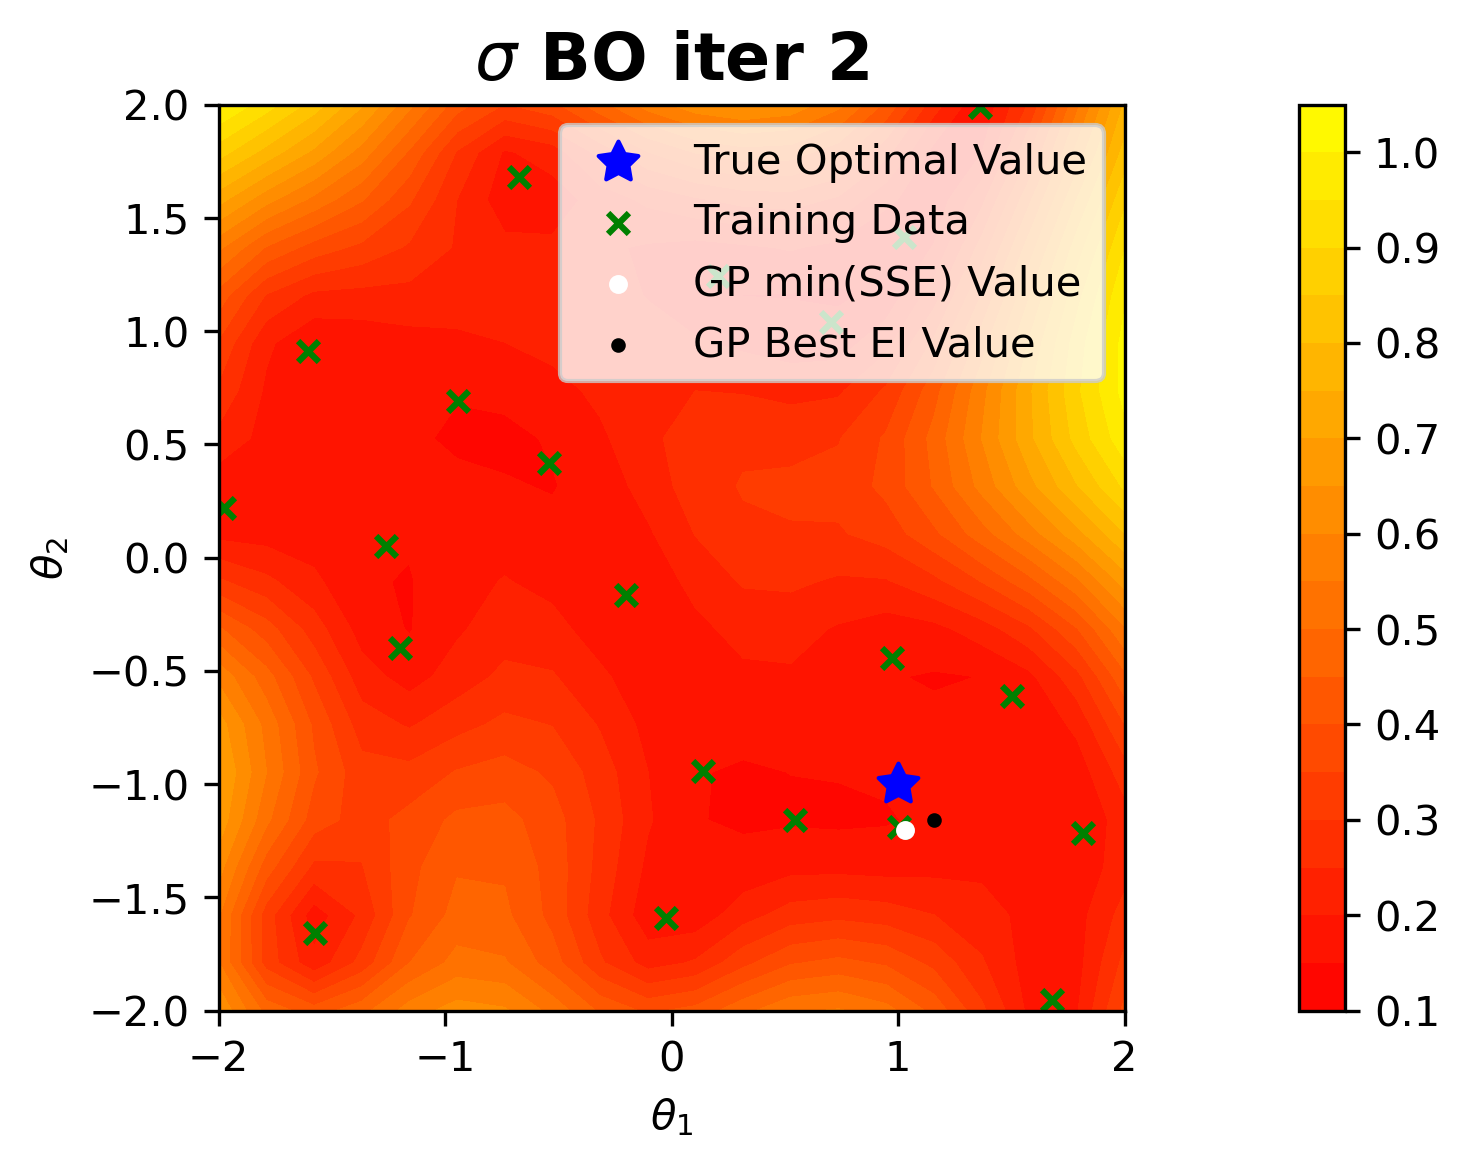

Best Error is: 0.1639


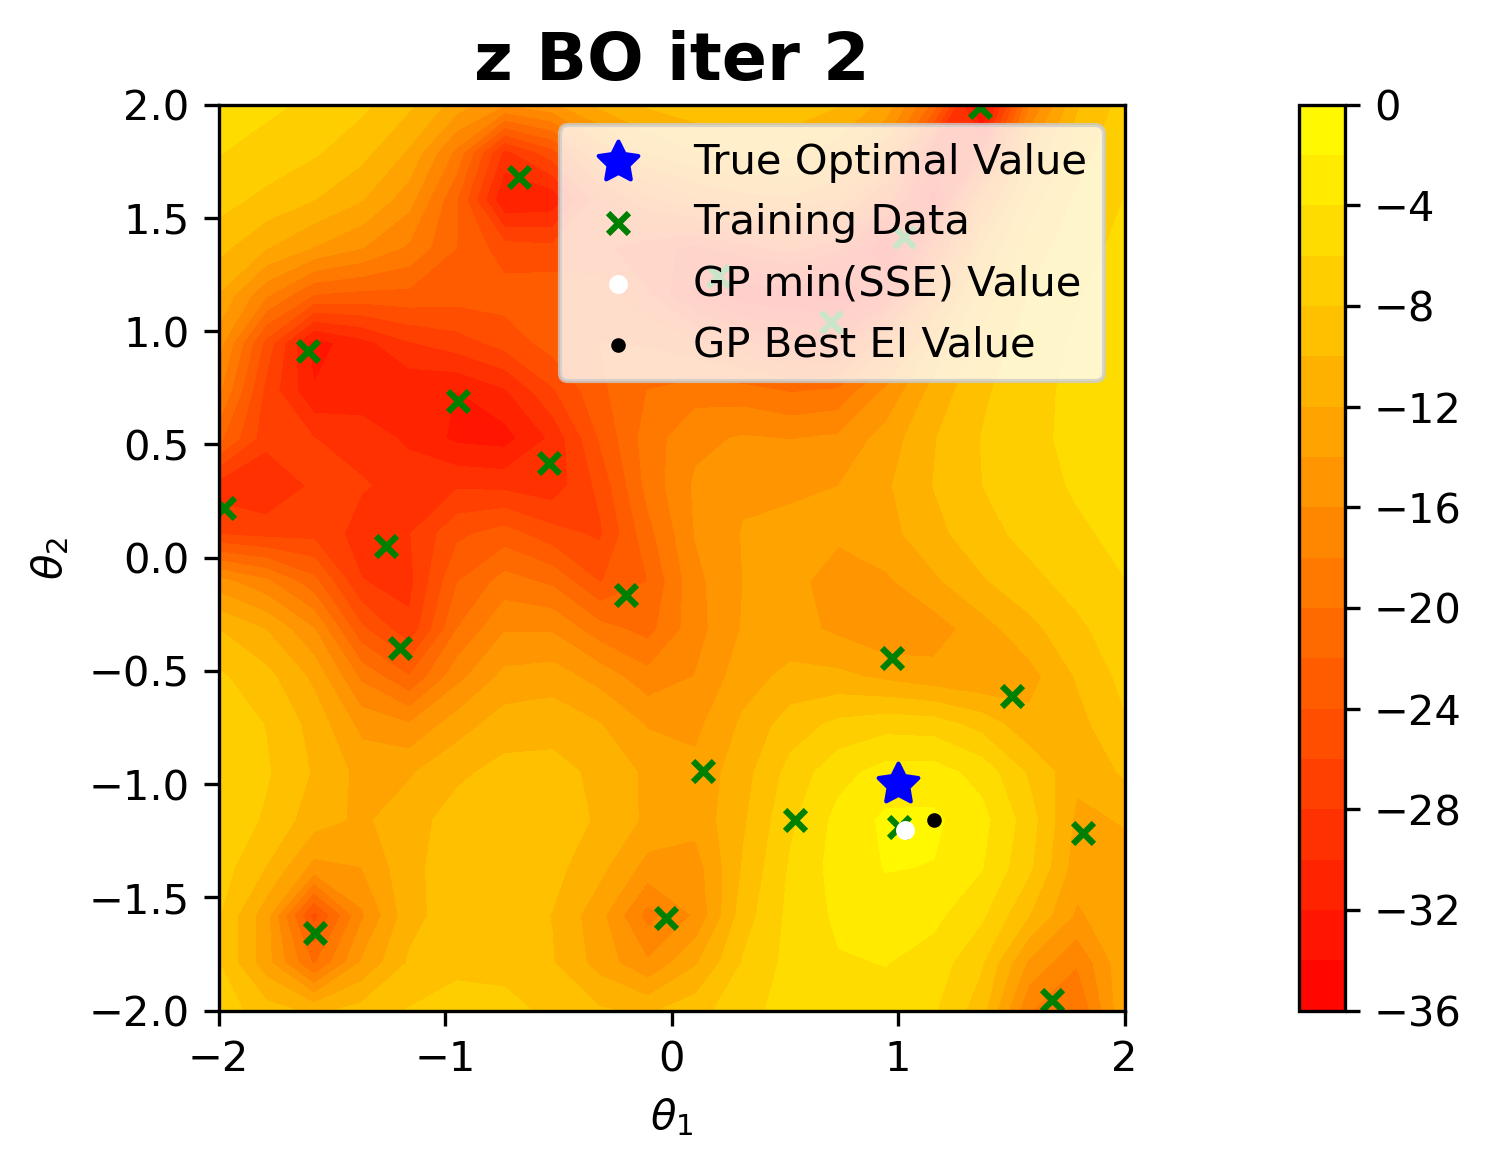

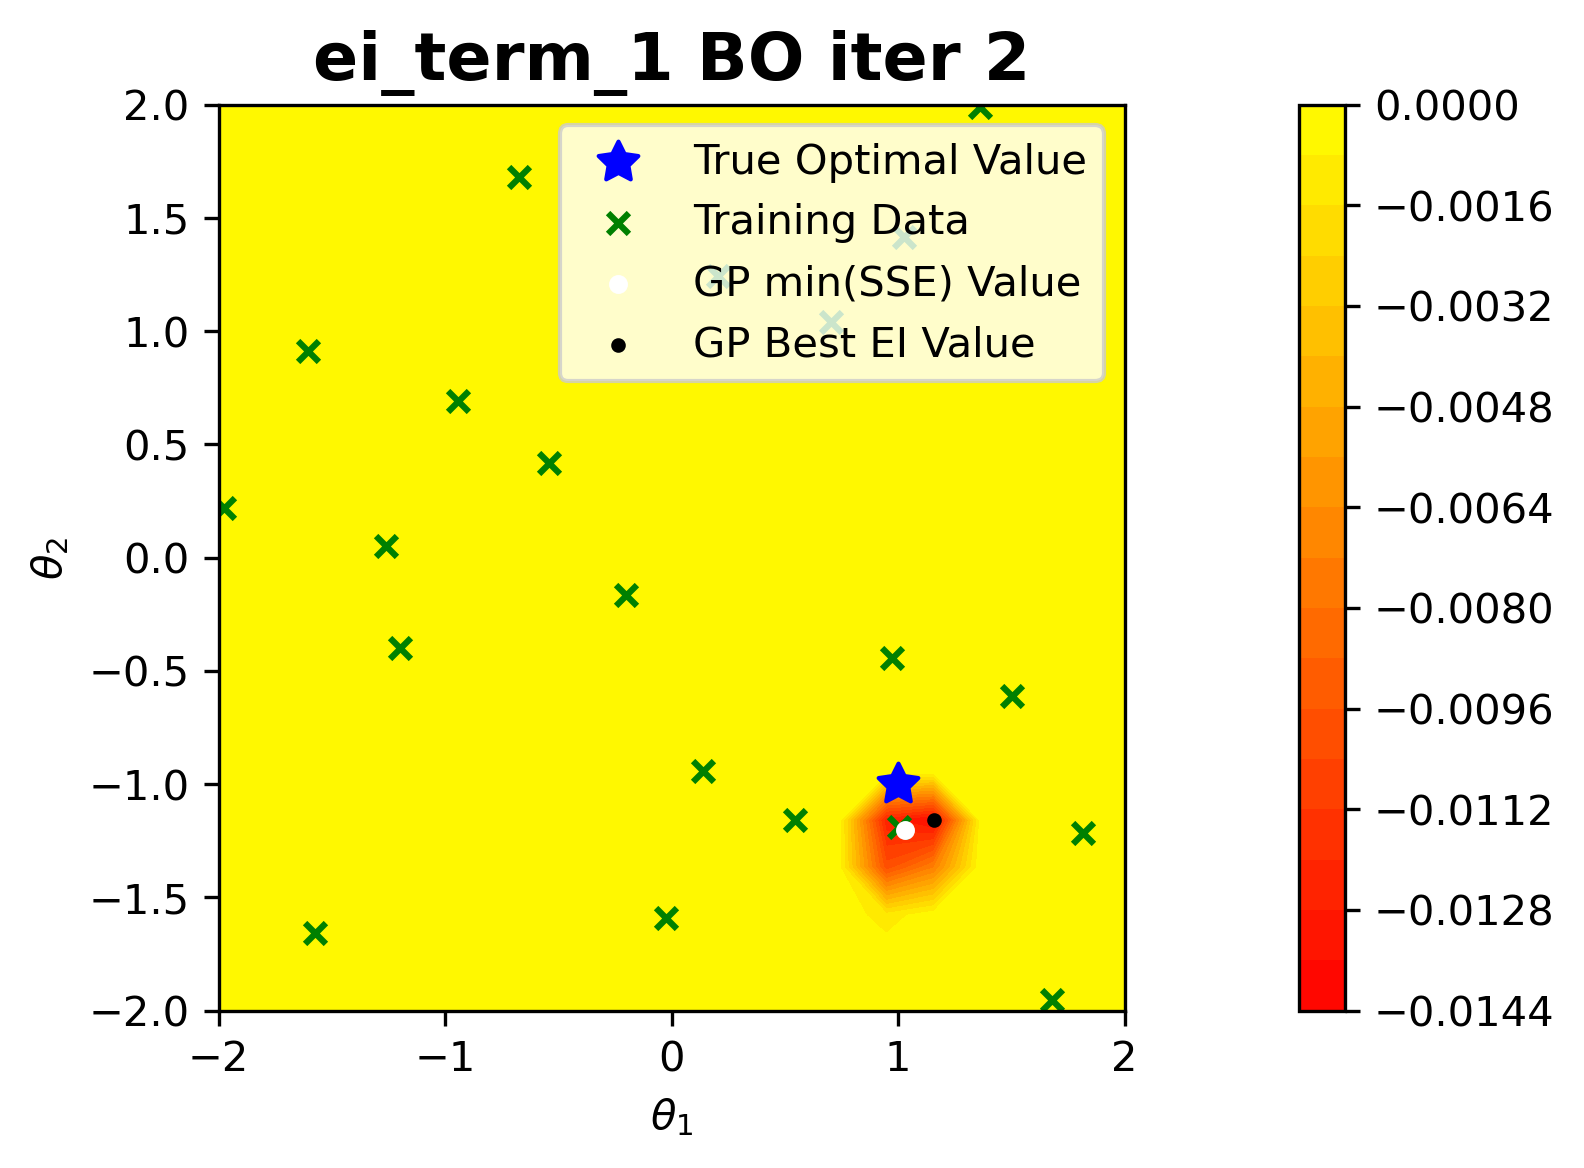

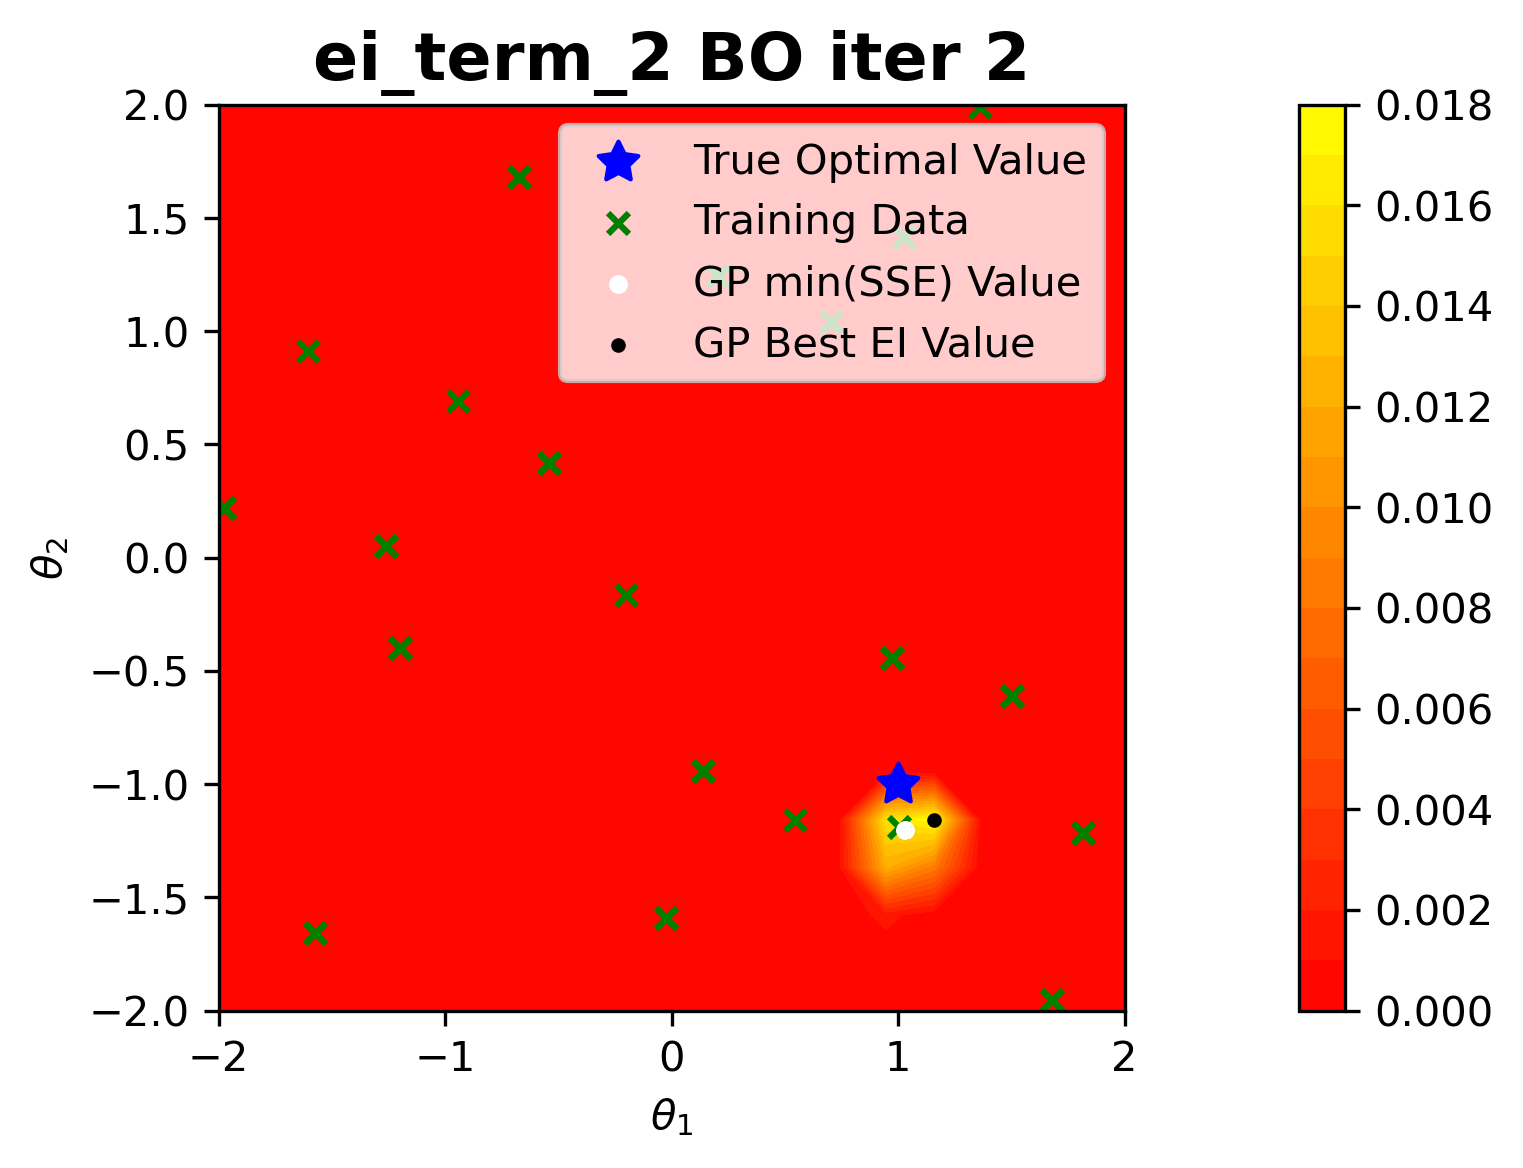

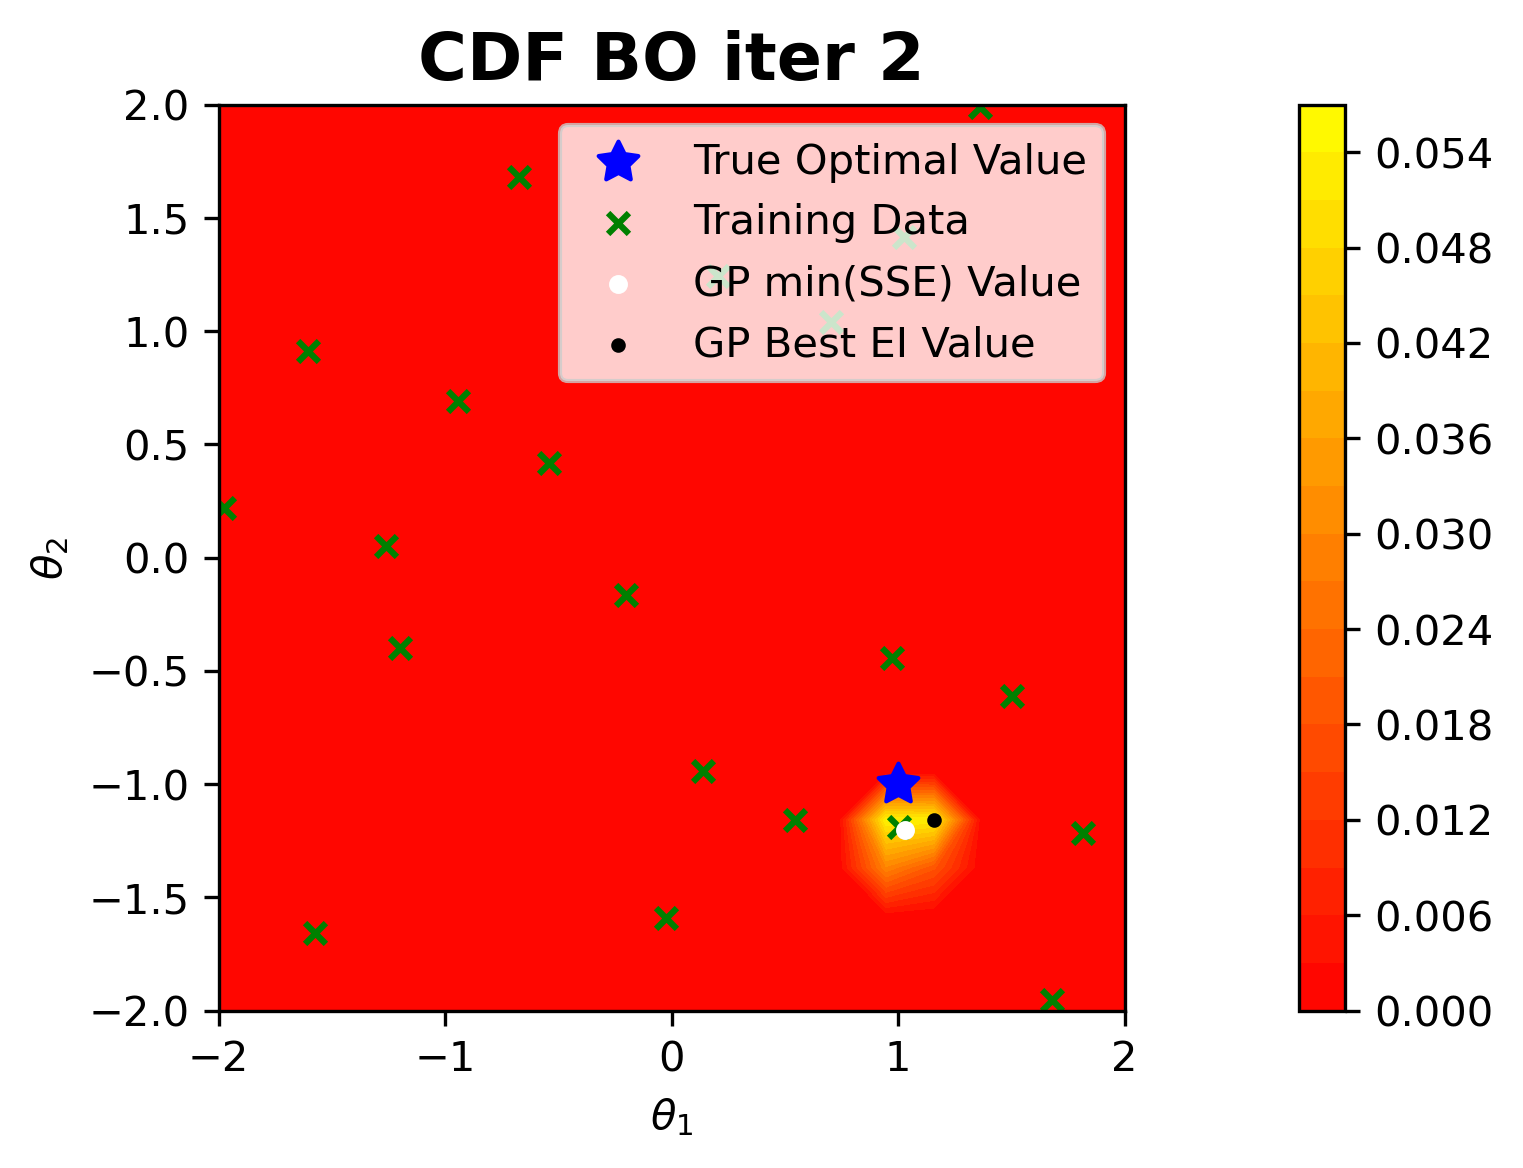

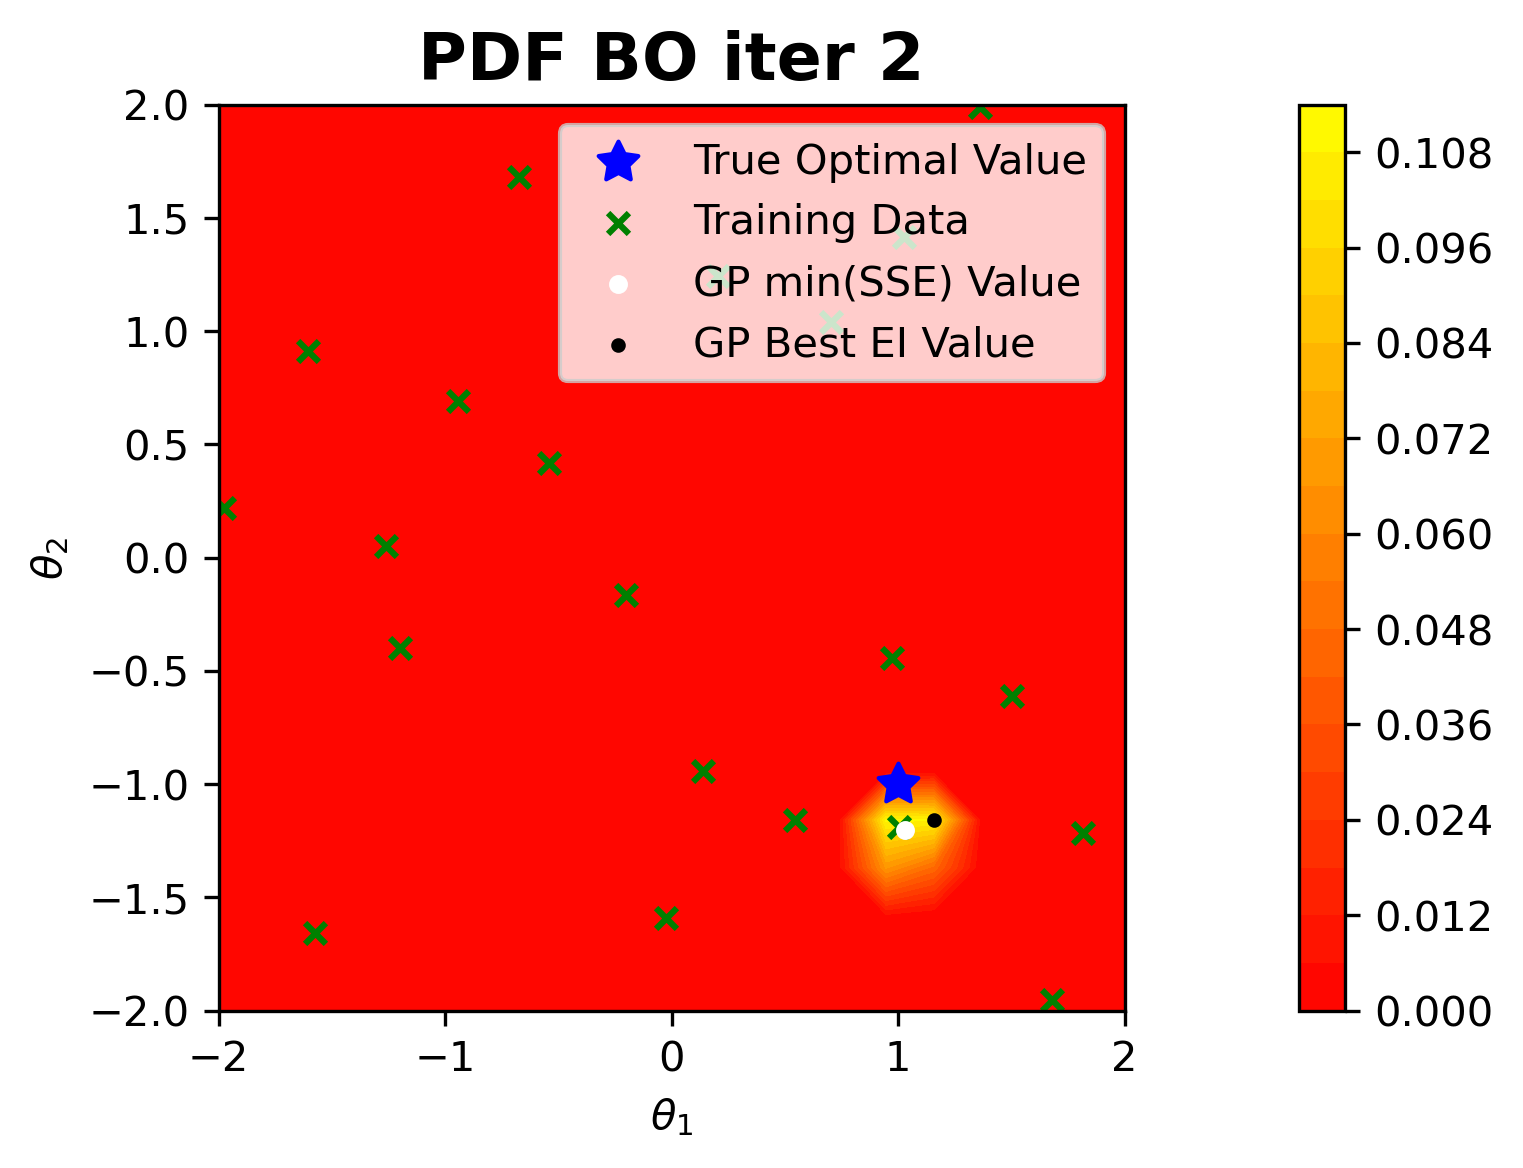

Magnitude of ln(SSE) given Theta_Opt =  [ 1.03017434 -1.20296579] is 3.1334e-01


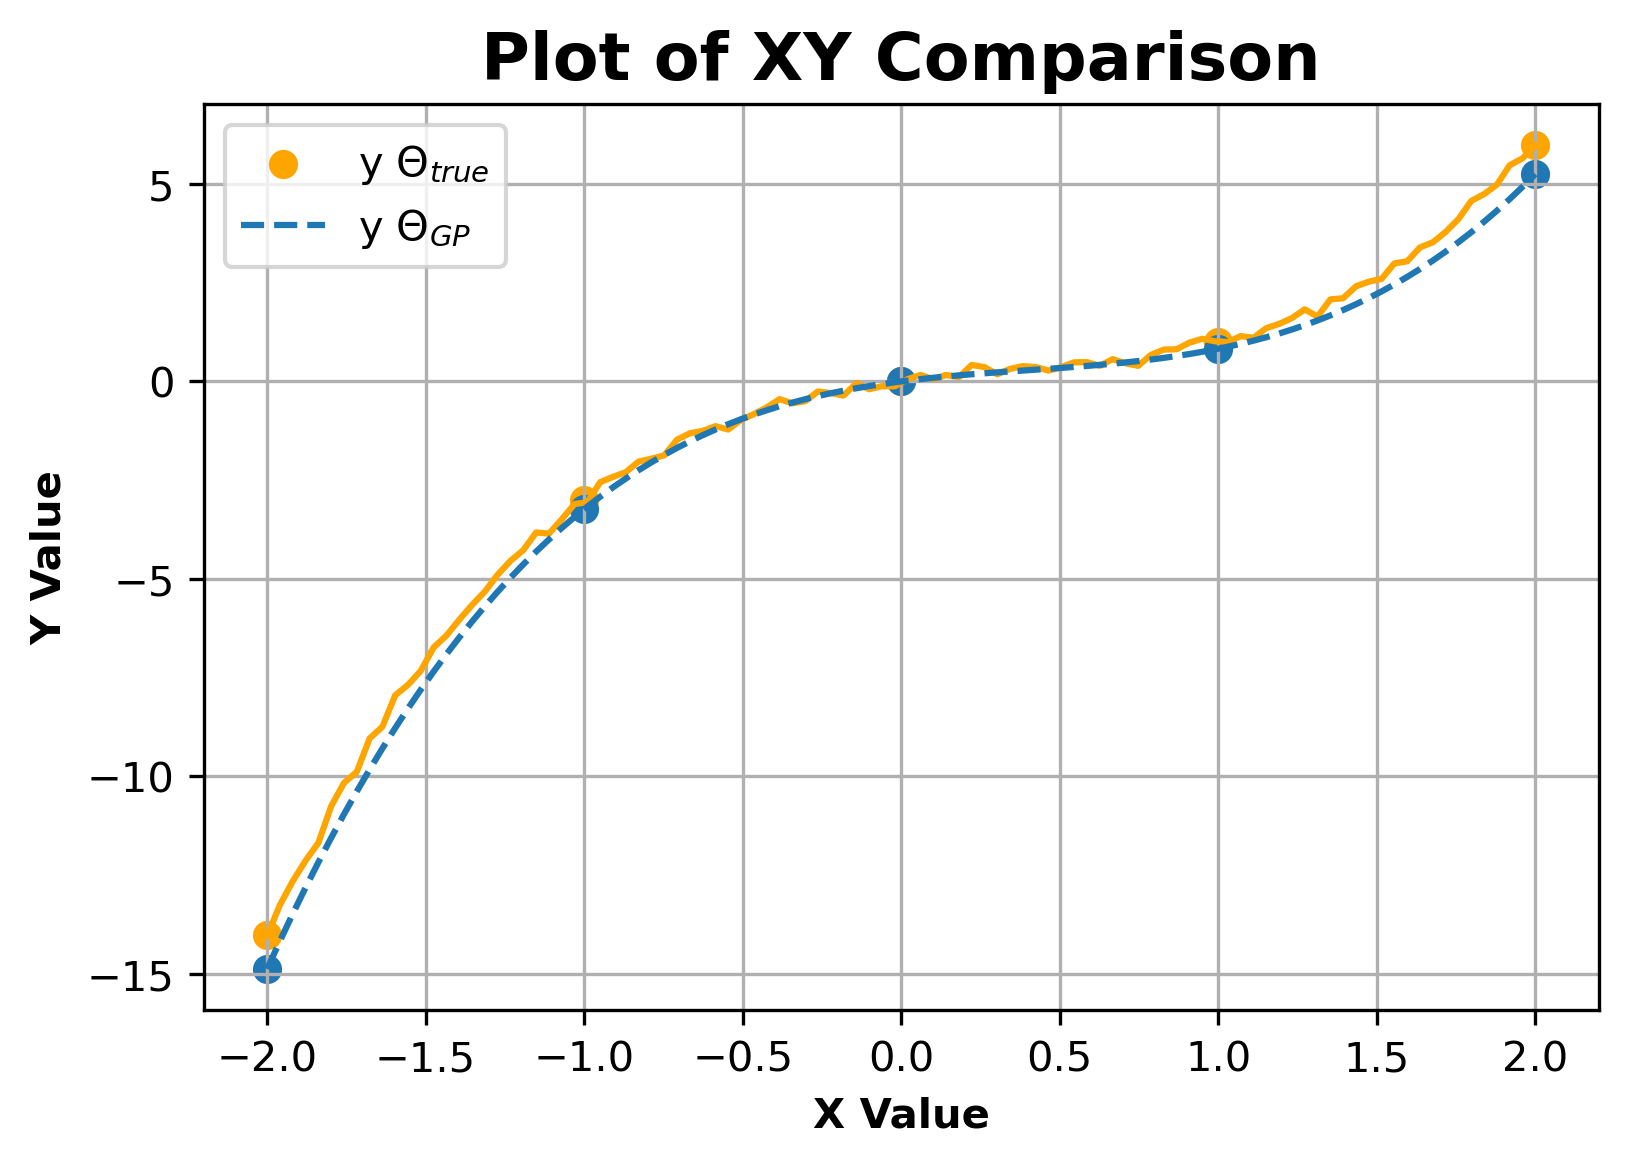

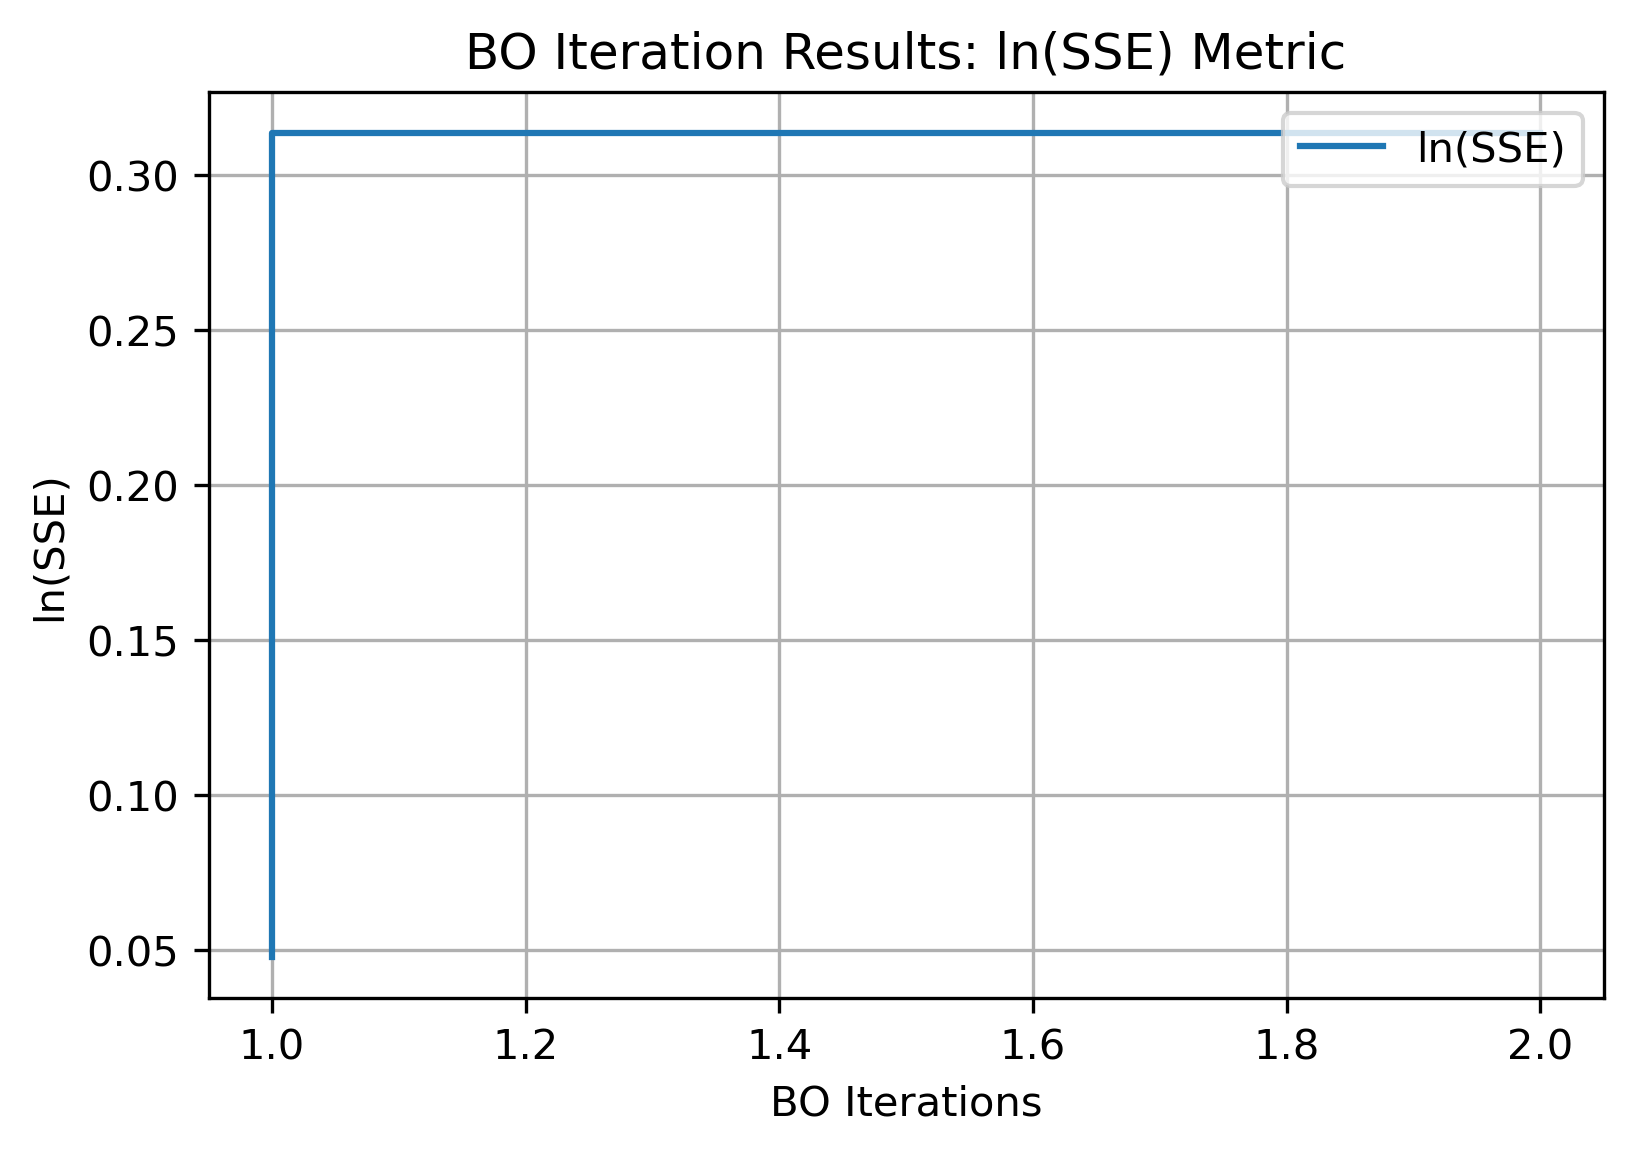

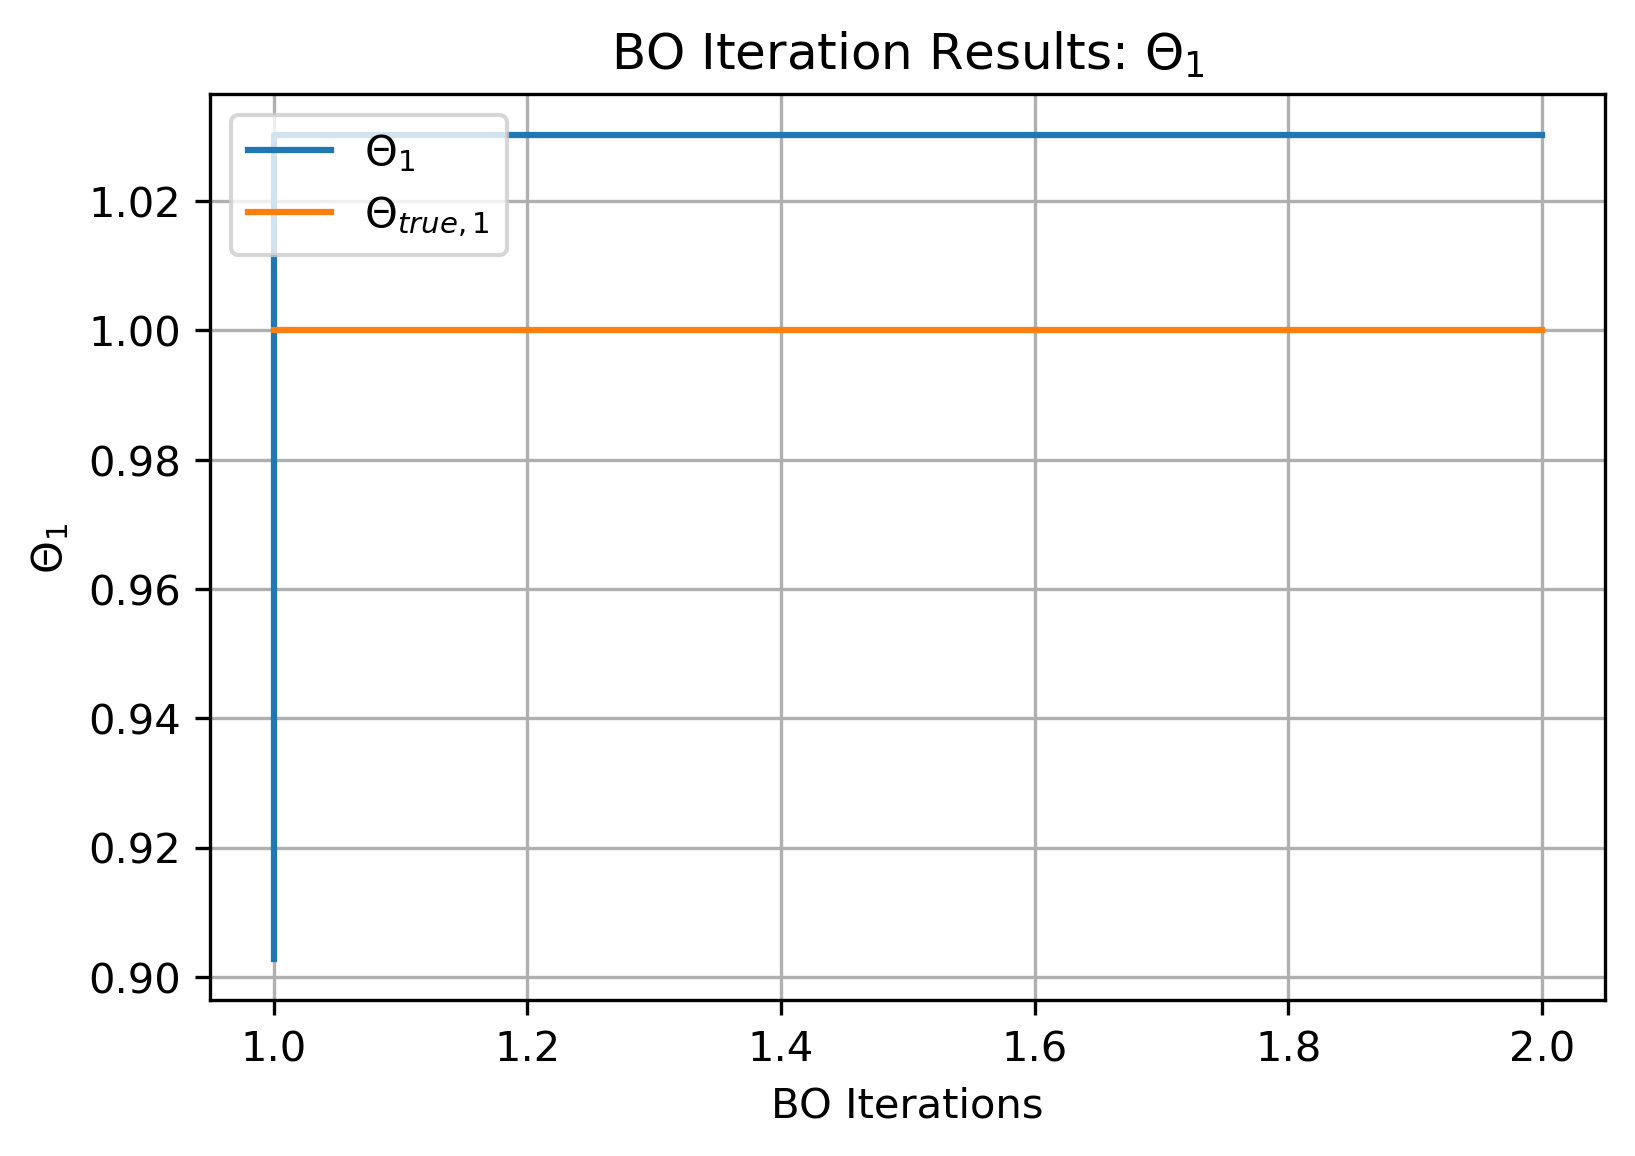

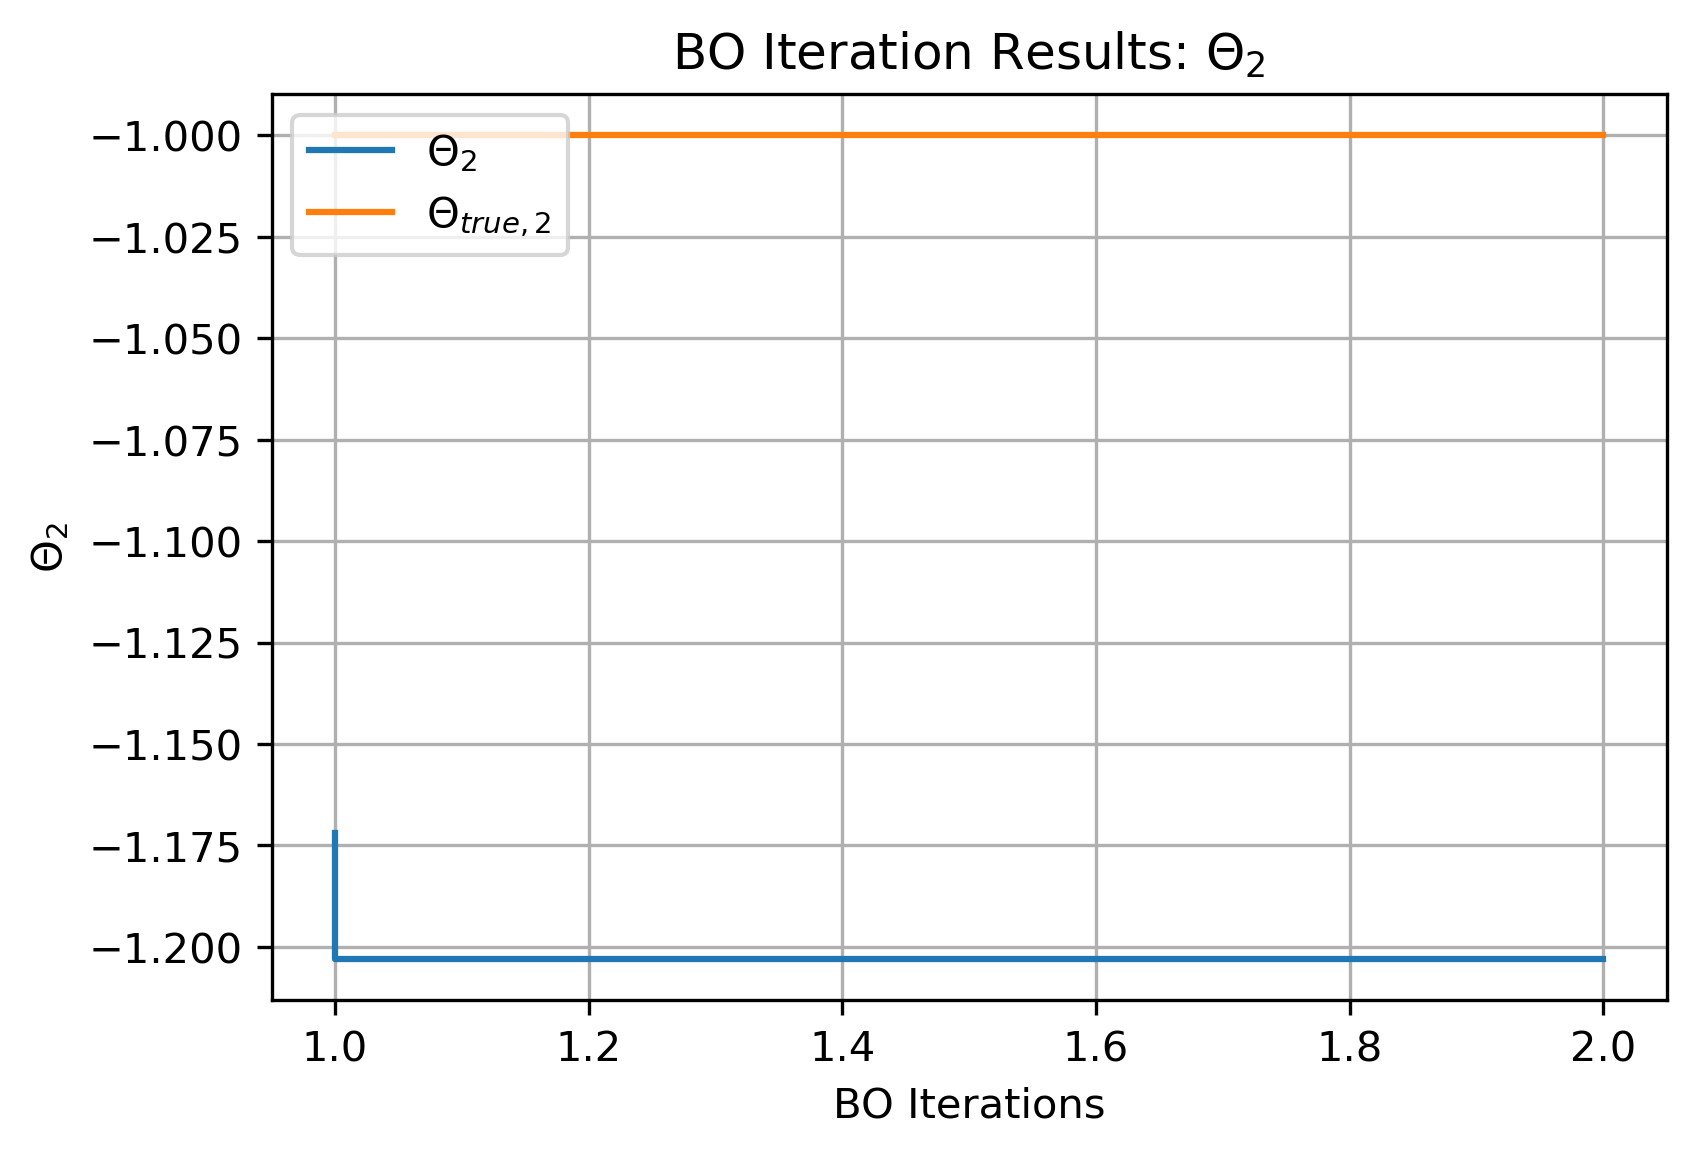

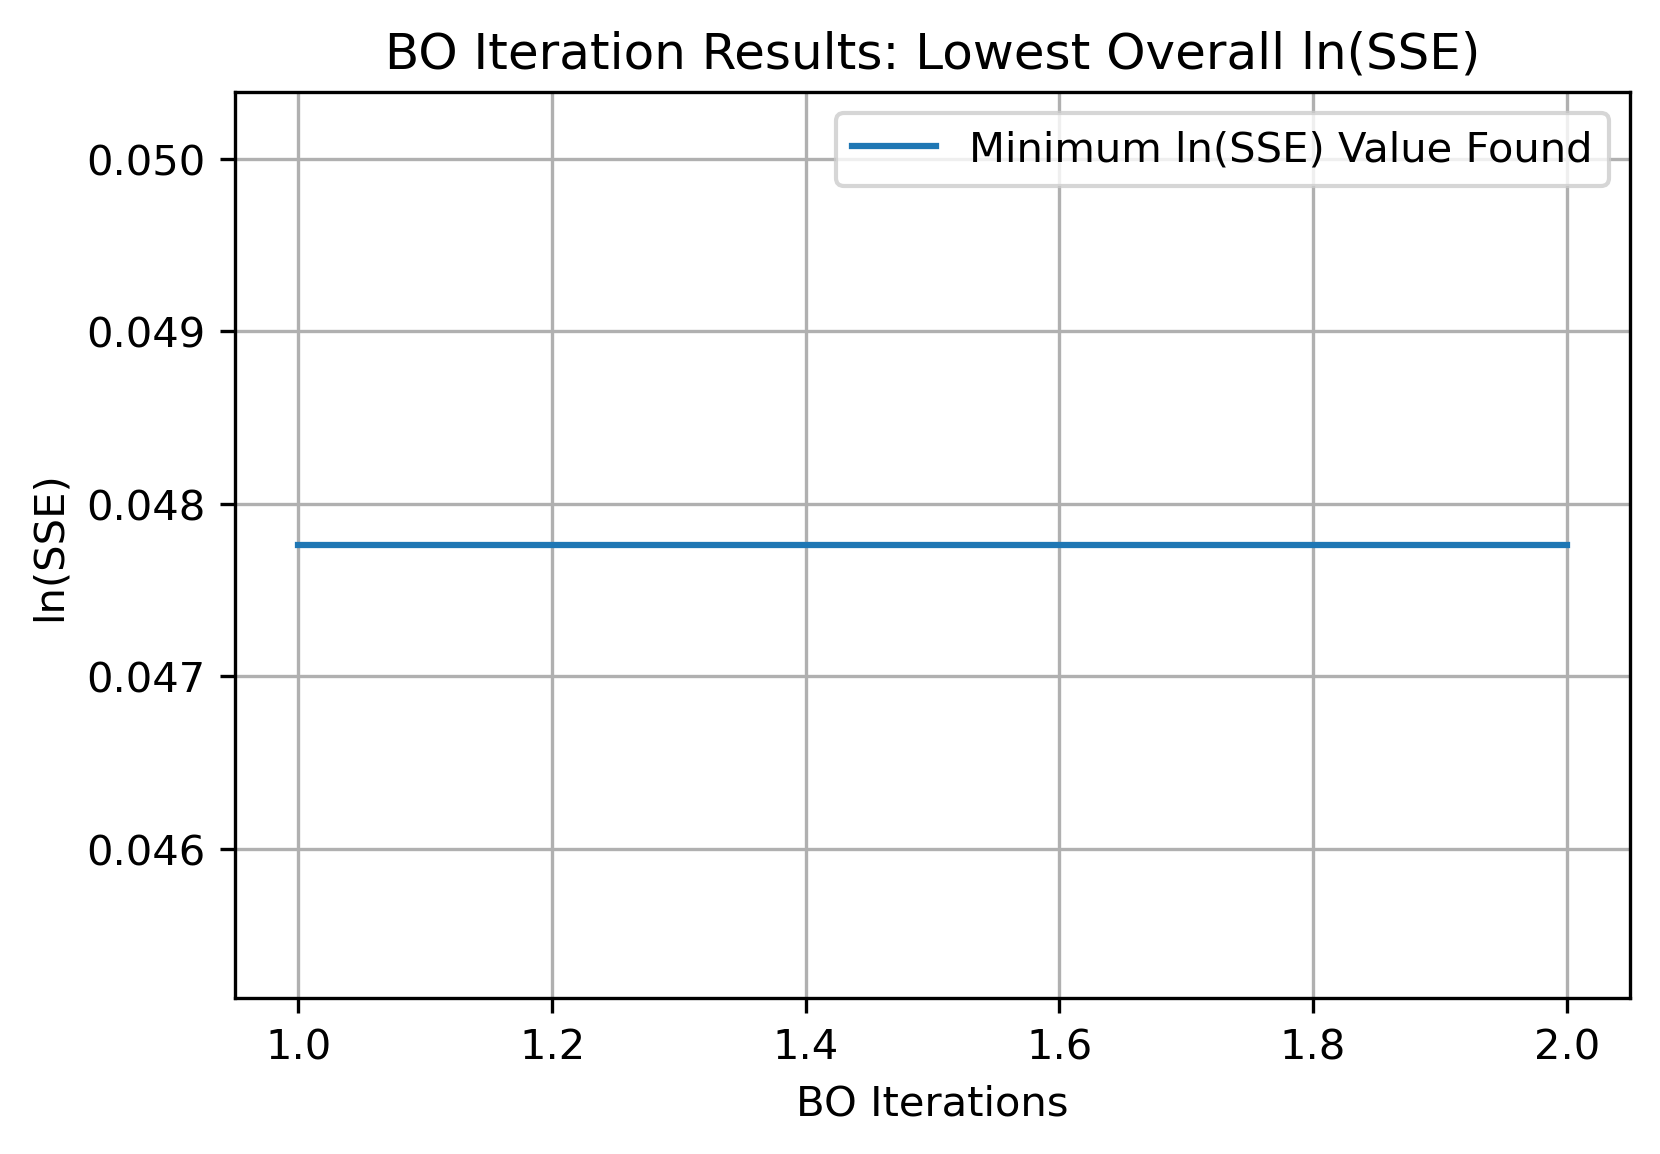

The GP predicts the lowest SSE of 1.049e+00 occurs at θ = [ 0.90275607 -1.17186508] during run 1 at BO iteration 1
At this point, the highest EI occurs at θ = [ 1.00281978 -1.1894251 ]


CPU times: user 11.3 s, sys: 103 ms, total: 11.4 s
Wall time: 11.4 s


In [19]:
%%time
all_data_doc = find_train_doc_path(emulator, obj, t)
all_data = np.array(pd.read_csv(all_data_doc, header=0,sep=",")) 

print("Runs:", runs)
print("BO Iters:", BO_iters)
print("----------------------------------------------------")
print("Separation Factor Train/Test:", str(np.round(sep_fact,3)))
print("Lengthscale Set To:", set_lengthscale)
print("Initial Explore Bias:", str(np.round(float(ep),3)))
results = bo_iter_w_runs(BO_iters,all_data_doc,t,theta_mesh,Theta_True,train_iter,ep, Xexp, Yexp,
                             noise_std, obj, runs, sparse_grid, emulator, set_lengthscale, verbose, 
                             save_fig, shuffle_seed, DateTime, sep_fact = sep_fact)
print("The GP predicts the lowest SSE of", "{:.3e}".format(np.exp(results[3])), "occurs at \u03B8 =", results[2][0], 
          "during run", results[1], "at BO iteration", results[0])
print("At this point, the highest EI occurs at \u03B8 =", results[4][0])
print("\n")